# Intro to geopandas: The very basics

- Fundamentals
- Basic **choropleth** plots
- Centroids and projections
- Points and polygons
- Case study: Visualize land area needed to generate all US electricity with solar

<img src="geopanda_pic.png" alt="drawing" style="width:225px;"/>

## Load the library, create and environment if needed

- Load as `gpd` as below...
- You may need to create an new virtual environment to use geopandas...
- To create a new environment, you can follow the following steps:

In [ ]:
#To make a new environment and install packages in the terminal:

#conda create -n my_env
#conda activate my_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install <my_package>


In [50]:
#Now load geopandas plus other standard libraries
#####

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import geopandas as gpd

## Basic geopandas: First let's load some very basic Natural Earth data

In [51]:
#First, we'll load some simple data courtesy of Natural Earth
#Can get many other local or remote datasets, start with this:

#Geopandas has three built-in datasets that you can use to test with
#Check using this command:
display(gpd.datasets.available)


['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [52]:
#Let's get naturalearth_lowres as "gdf":
#"gdf" is a common generic variable name = GeoDataFrame
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#And now let's display the GeoDataFrame using the head() method
#Many of the same Pandas methods, etc. for DataFrames work with GeoDataFrames
display(gdf.head())

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [53]:
#Could also show the last five
gdf.tail()

#Or, say, the first 15:
#gdf.head(15)

pop_est      continent                 name iso_a3  gdp_md_est  \
172   6944975.0         Europe               Serbia    SRB       51475   
173    622137.0         Europe           Montenegro    MNE        5542   
174   1794248.0         Europe               Kosovo    -99        7926   
175   1394973.0  North America  Trinidad and Tobago    TTO       24269   
176  11062113.0         Africa             S. Sudan    SSD       11998   

                                              geometry  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...

<AxesSubplot: >

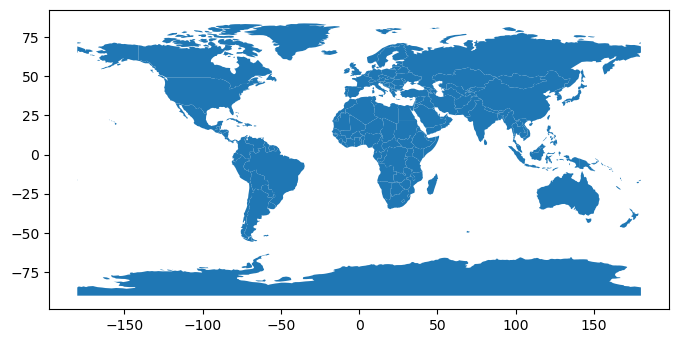

In [54]:
#And for the most basic of plots...
######

gdf.plot(figsize=(8,8))

<AxesSubplot: >

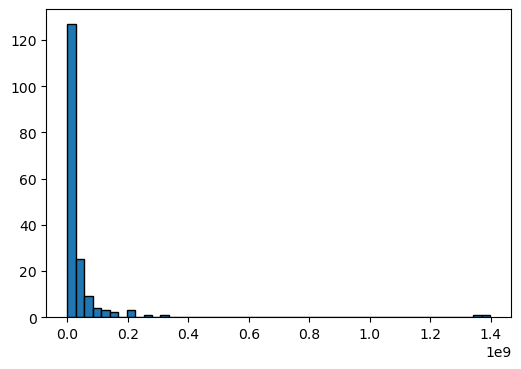

In [55]:
#Note that we can use the same pandas plotting stuff as for standard DataFrames:
####

#Do a quick histogram of population:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,4))

gdf['pop_est'].hist(ax = ax1, bins = 50, edgecolor='black', grid=False)


<AxesSubplot: ylabel='Frequency'>

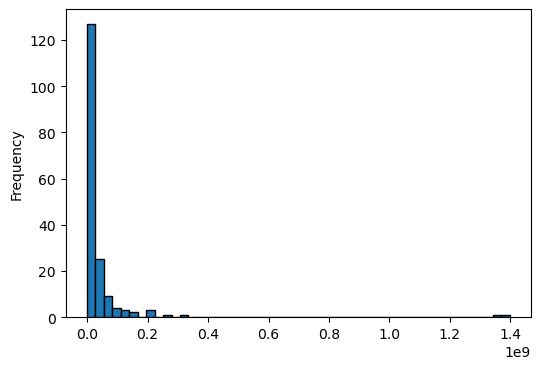

In [56]:
#Could also do:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,4))

gdf['pop_est'].plot(ax=ax1, kind='hist', bins = 50, edgecolor='black')

In [57]:
#Note we have some apparent outliers:
gdf.sort_values(by='pop_est', ascending=False).head(10)

pop_est      continent                      name iso_a3  gdp_md_est  \
139  1.397715e+09           Asia                     China    CHN    14342903   
98   1.366418e+09           Asia                     India    IND     2868929   
4    3.282395e+08  North America  United States of America    USA    21433226   
8    2.706256e+08           Asia                 Indonesia    IDN     1119190   
102  2.165653e+08           Asia                  Pakistan    PAK      278221   
29   2.110495e+08  South America                    Brazil    BRA     1839758   
56   2.009636e+08         Africa                   Nigeria    NGA      448120   
99   1.630462e+08           Asia                Bangladesh    BGD      302571   
18   1.443735e+08         Europe                    Russia    RUS     1699876   
27   1.275755e+08  North America                    Mexico    MEX     1268870   

                                              geometry  
139  MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...  
98   POLYGON ((97.32711 28.26158, 97.40256 27.88254...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
8    MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...  
102  POLYGON ((77.83745 35.49401, 76.87172 34.65354...  
29   POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
56   POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....  
99   POLYGON ((92.67272 22.04124, 92.65226 21.32405...  
18   MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...  
27   POLYGON ((-117.12776 32.53534, -115.99135 32.6...

### Can also do pandas plot methods with geopandas:
Use *`kind`* keyword argument with `plot()` method. Recall options:

- `bar` or `barh` for bar plots

- `hist` for histogram

- `box` for boxplot

- `kde` or `density` for density plots

- `area` for area plots

- `scatter` for scatter plots

- `hexbin` for hexagonal bin plots

- `pie` for pie plots


C:\Users\steff\AppData\Local\Temp\ipykernel_30592\915216059.py:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax2, ax3 = gdf.boxplot(column = ["pop_est", "gdp_md_est"], by = "continent", ax = ax1, showmeans=True,


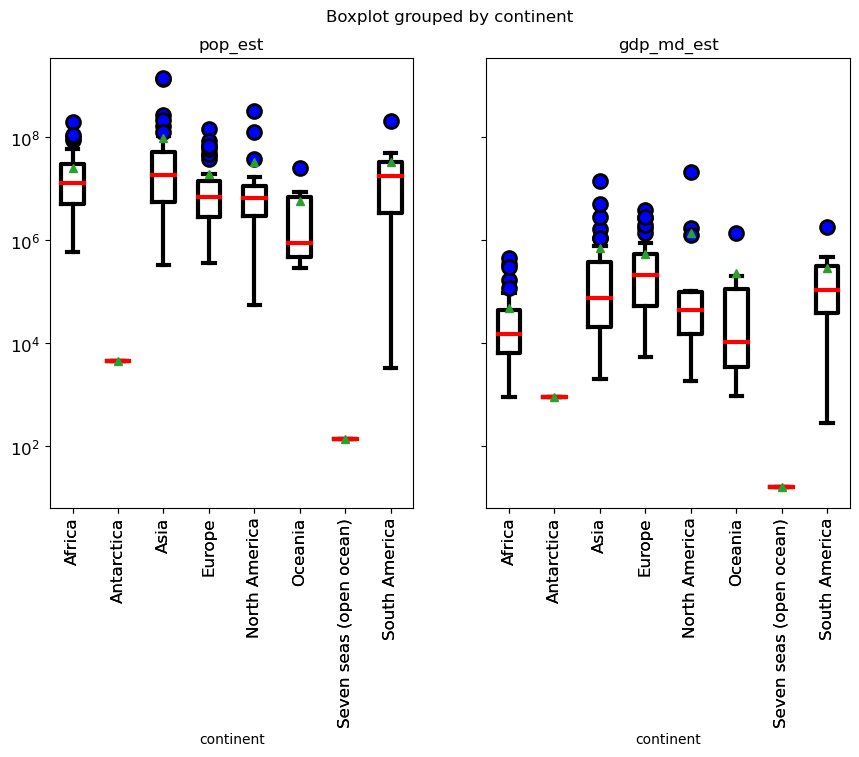

In [58]:
#For example, a customized boxplot with pandas plotting:
#Population and gpd by continent

#Set up our properties...
boxprops = dict(linewidth = 3, color = 'black')
whiskerprops = dict(linestyle = '-', linewidth=3, color='black')
capprops = dict(linewidth = 3, color = 'black')
flierprops = dict(markersize=10, markeredgewidth=2, markeredgecolor='black', markerfacecolor='blue')
medianprops = dict(linewidth = 3, color = 'red')

#And plot!
##########
fig1, ax1 = plt.subplots(1, 1, figsize=(10,6))

#Do both pop_est and gdp_md_est
ax2, ax3 = gdf.boxplot(column = ["pop_est", "gdp_md_est"], by = "continent", ax = ax1, showmeans=True, 
            boxprops = boxprops,
            whiskerprops = whiskerprops,
            capprops = capprops,
            flierprops = flierprops,
            medianprops = medianprops,
            rot = 90, grid=False, fontsize=12);

#Try with vs. without log scale
ax3.set_yscale('log');


### Some Basic “Choropleth” Plots!

[]

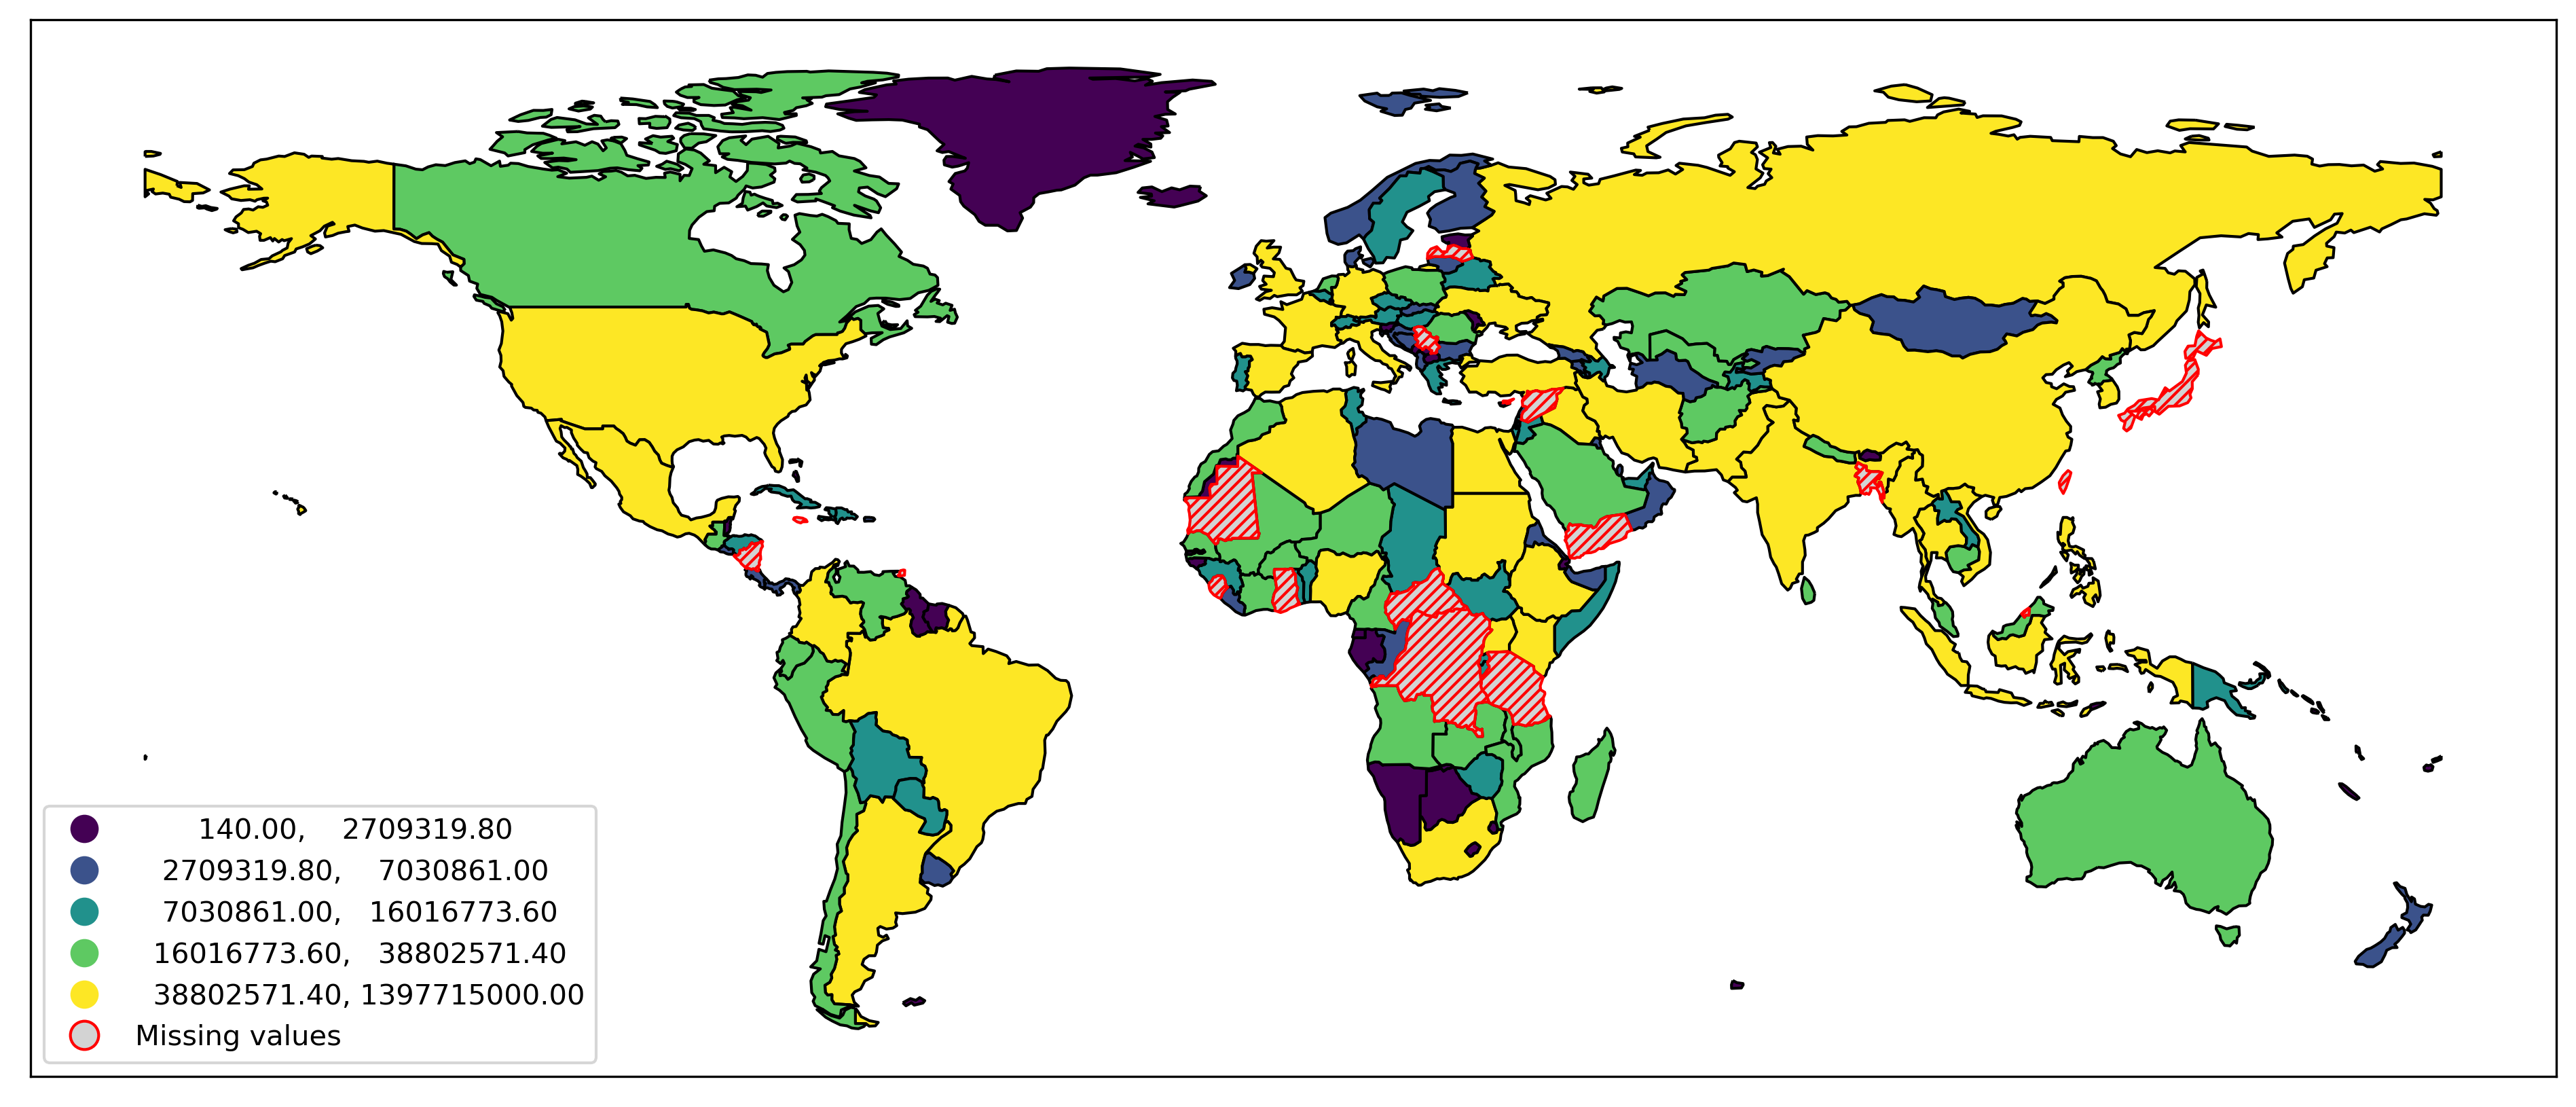

In [63]:
#Let's plot with some random counties NaNed
##########

#Re-load our data
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Exclude Antarctica
gdf = gdf.loc[gdf.continent != 'Antarctica']


#Take 20 countries, set population to np.nan
gdf.loc[np.random.choice(gdf.index, 20), 'pop_est'] = np.nan


fig, ax1 = plt.subplots(1,1, figsize=(16, 10), dpi=300)

#Note: scheme + k
#edgecolor: "black", etc. vs. "face"
#missing_kwds, legend, and legend_kwds

gdf.plot(ax=ax1, scheme="quantiles", k = 5, column = 'pop_est', linewidth = 1, edgecolor = 'black',
           missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "//////", "label": "Missing values"},
           legend = True, legend_kwds={'loc': 'lower left'}) 


#Set some axis stuff
######

ax1.set_xticks([])
ax1.set_yticks([])

#Or could just:
#ax1.set_axis_off();


#### Let's plot individual continents...

In [64]:
#First, note the total_bounds for our GeoDataFrame:

gdf.total_bounds

array([-180.     ,  -55.61183,  180.     ,   83.64513])

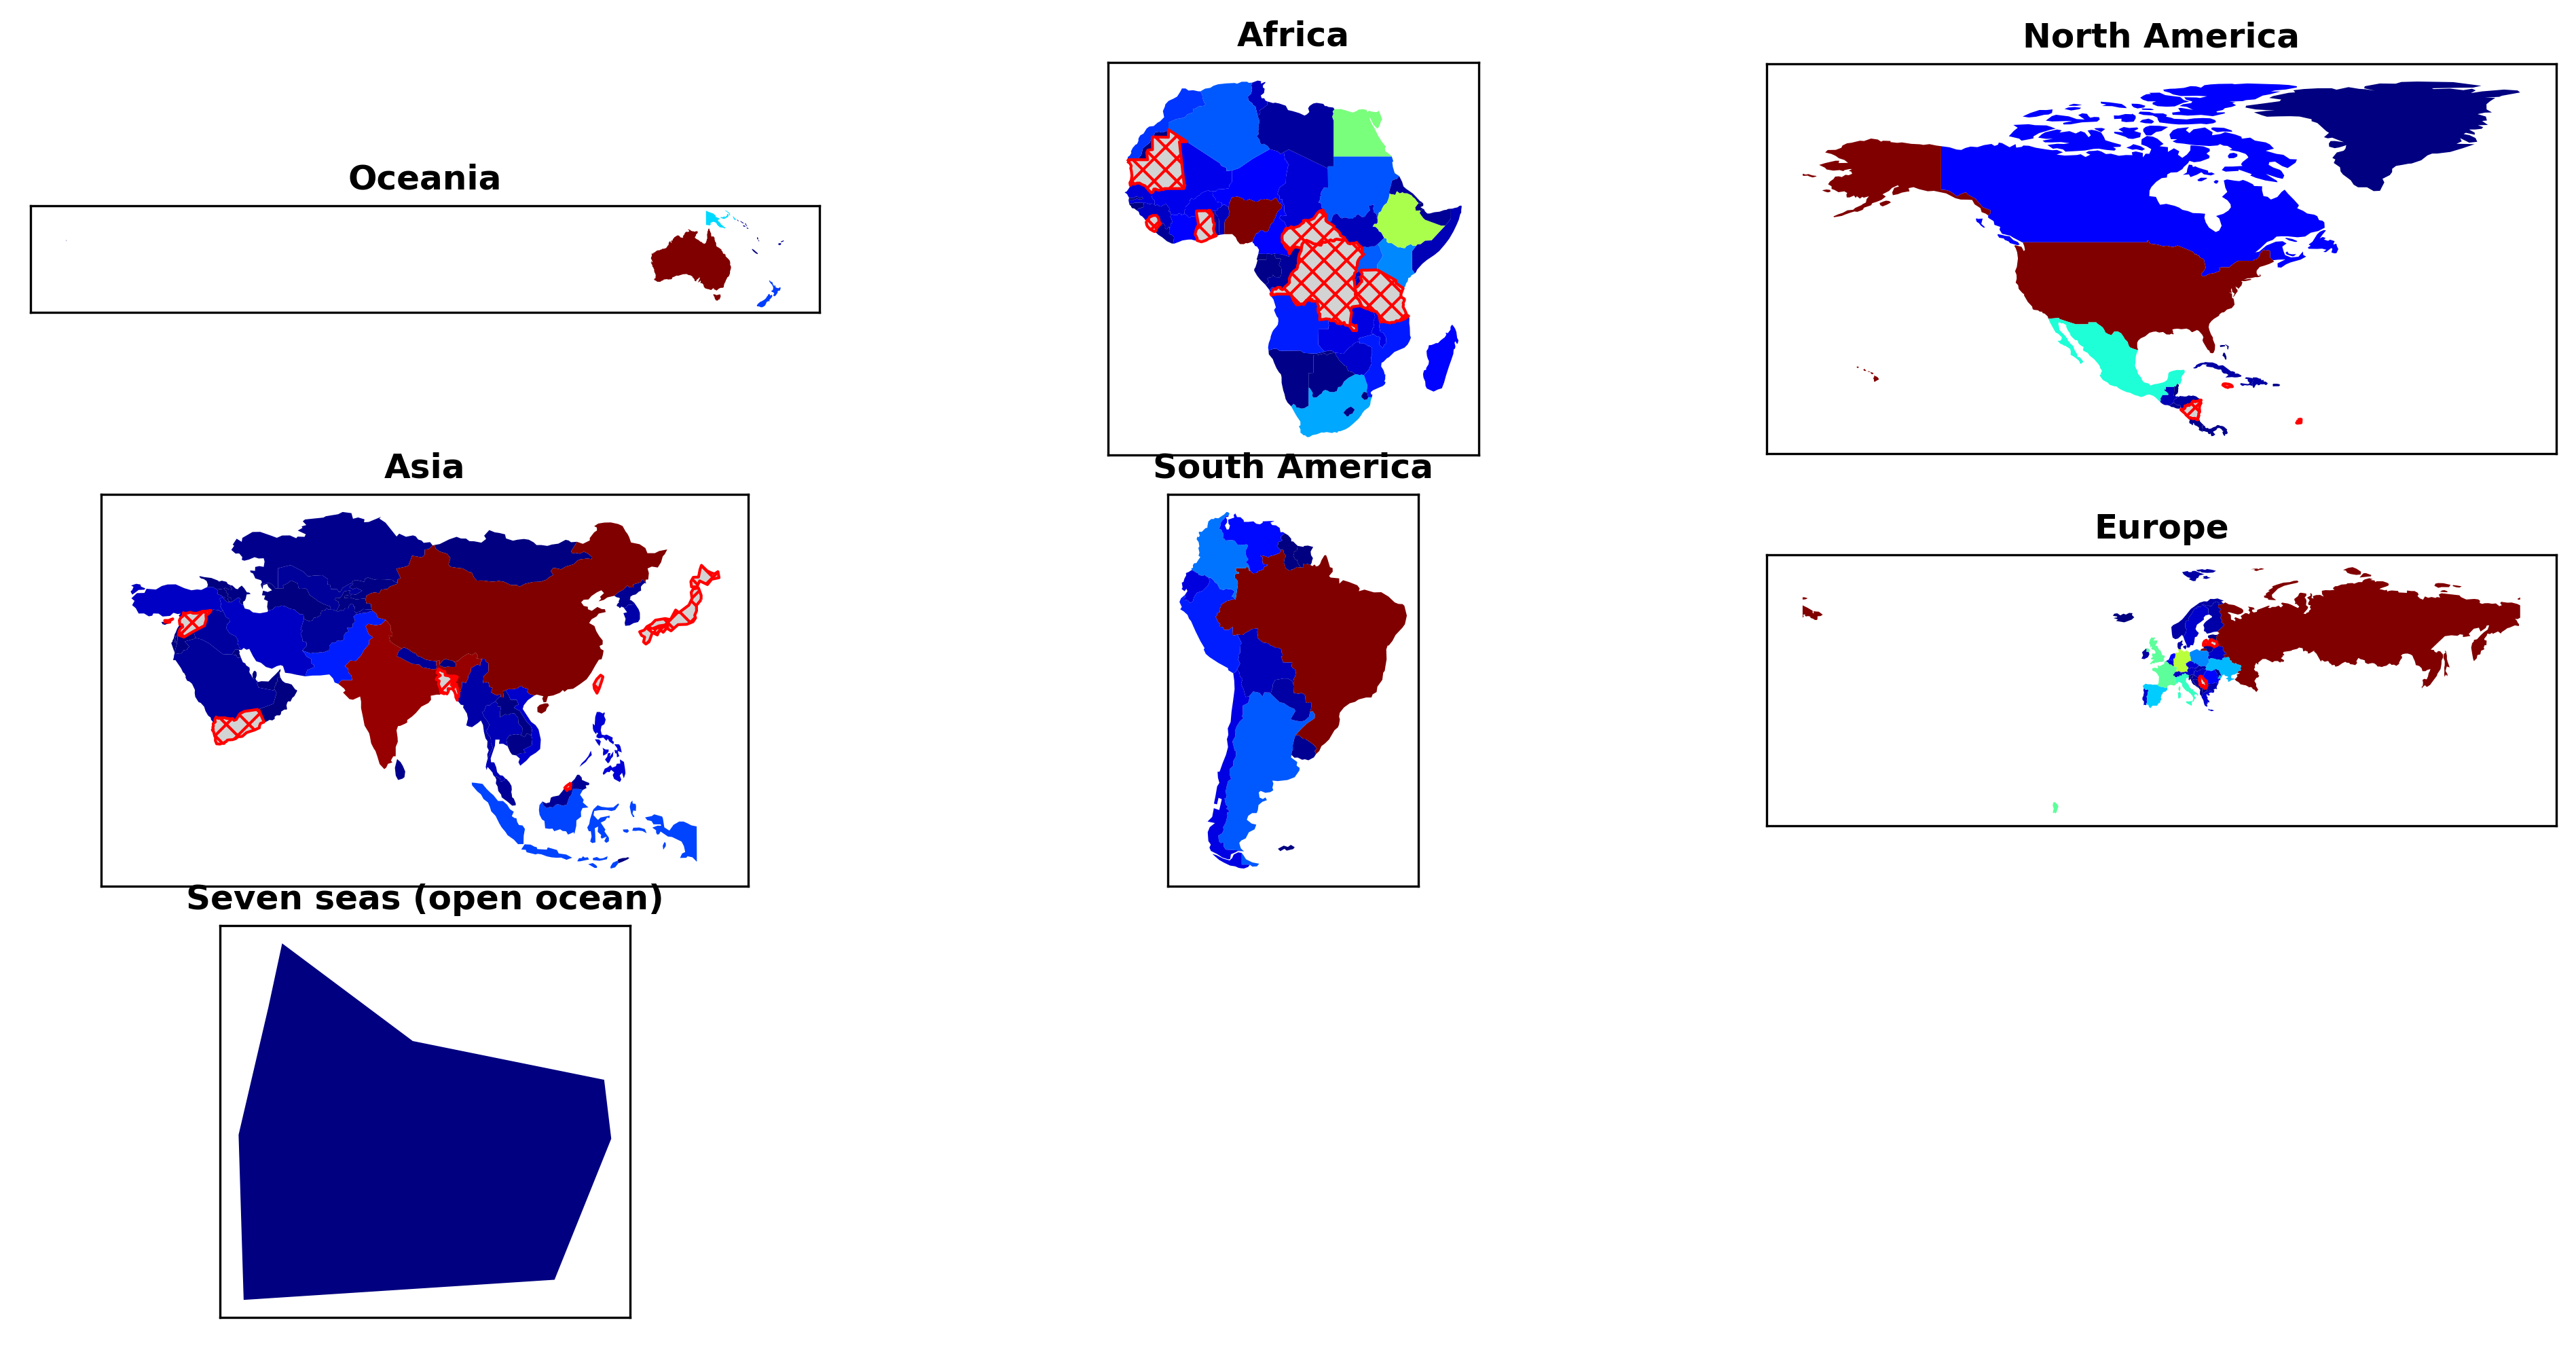

In [67]:
#Let's plot each continent in its own subfigure
#Have 8 continents, including open ocean

fig, ax1 = plt.subplots(3,3, figsize=(16, 8), dpi=300)

#This make indexing more convenient:
ax1 = ax1.flatten()


#Pythonic iteration though the continents
#######
for i, c in enumerate(gdf.continent.unique()):

    #Plot...
    gdf.loc[gdf['continent'] == c].plot(ax = ax1[i], column = 'pop_est', cmap = 'jet',
                                       missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///\\\\\\"})

    #Set title
    ax1[i].set_title(c, fontweight='bold')
    
    
    #Can do this vs. not:
    if (0):
        #Let's set x and y lim to the overall gdf bounds
        #Unpack:
        x1, y1, x2, y2 = gdf.total_bounds

        #And set horizontal:
        ax1[i].set_xlim([x1, x2])

        #Give a little extra vertical:
        ax1[i].set_ylim([y1*1.1, y2*1.1])

        #Still note quite the same box:
        #Final fix is to set the aspect ratio:
        ax1[i].set_aspect(1) #('equal')


    #Remove the tick markers
    ax1[i].set_xticks([])
    ax1[i].set_yticks([])

    
    
#Get rid of the last few plots:
ax1[7].set_axis_off()
ax1[8].set_axis_off()

#We can finally make our subplots a little closer together if desired:
plt.subplots_adjust(hspace=0.1, wspace=0.1)

### A few simple choropleth plots

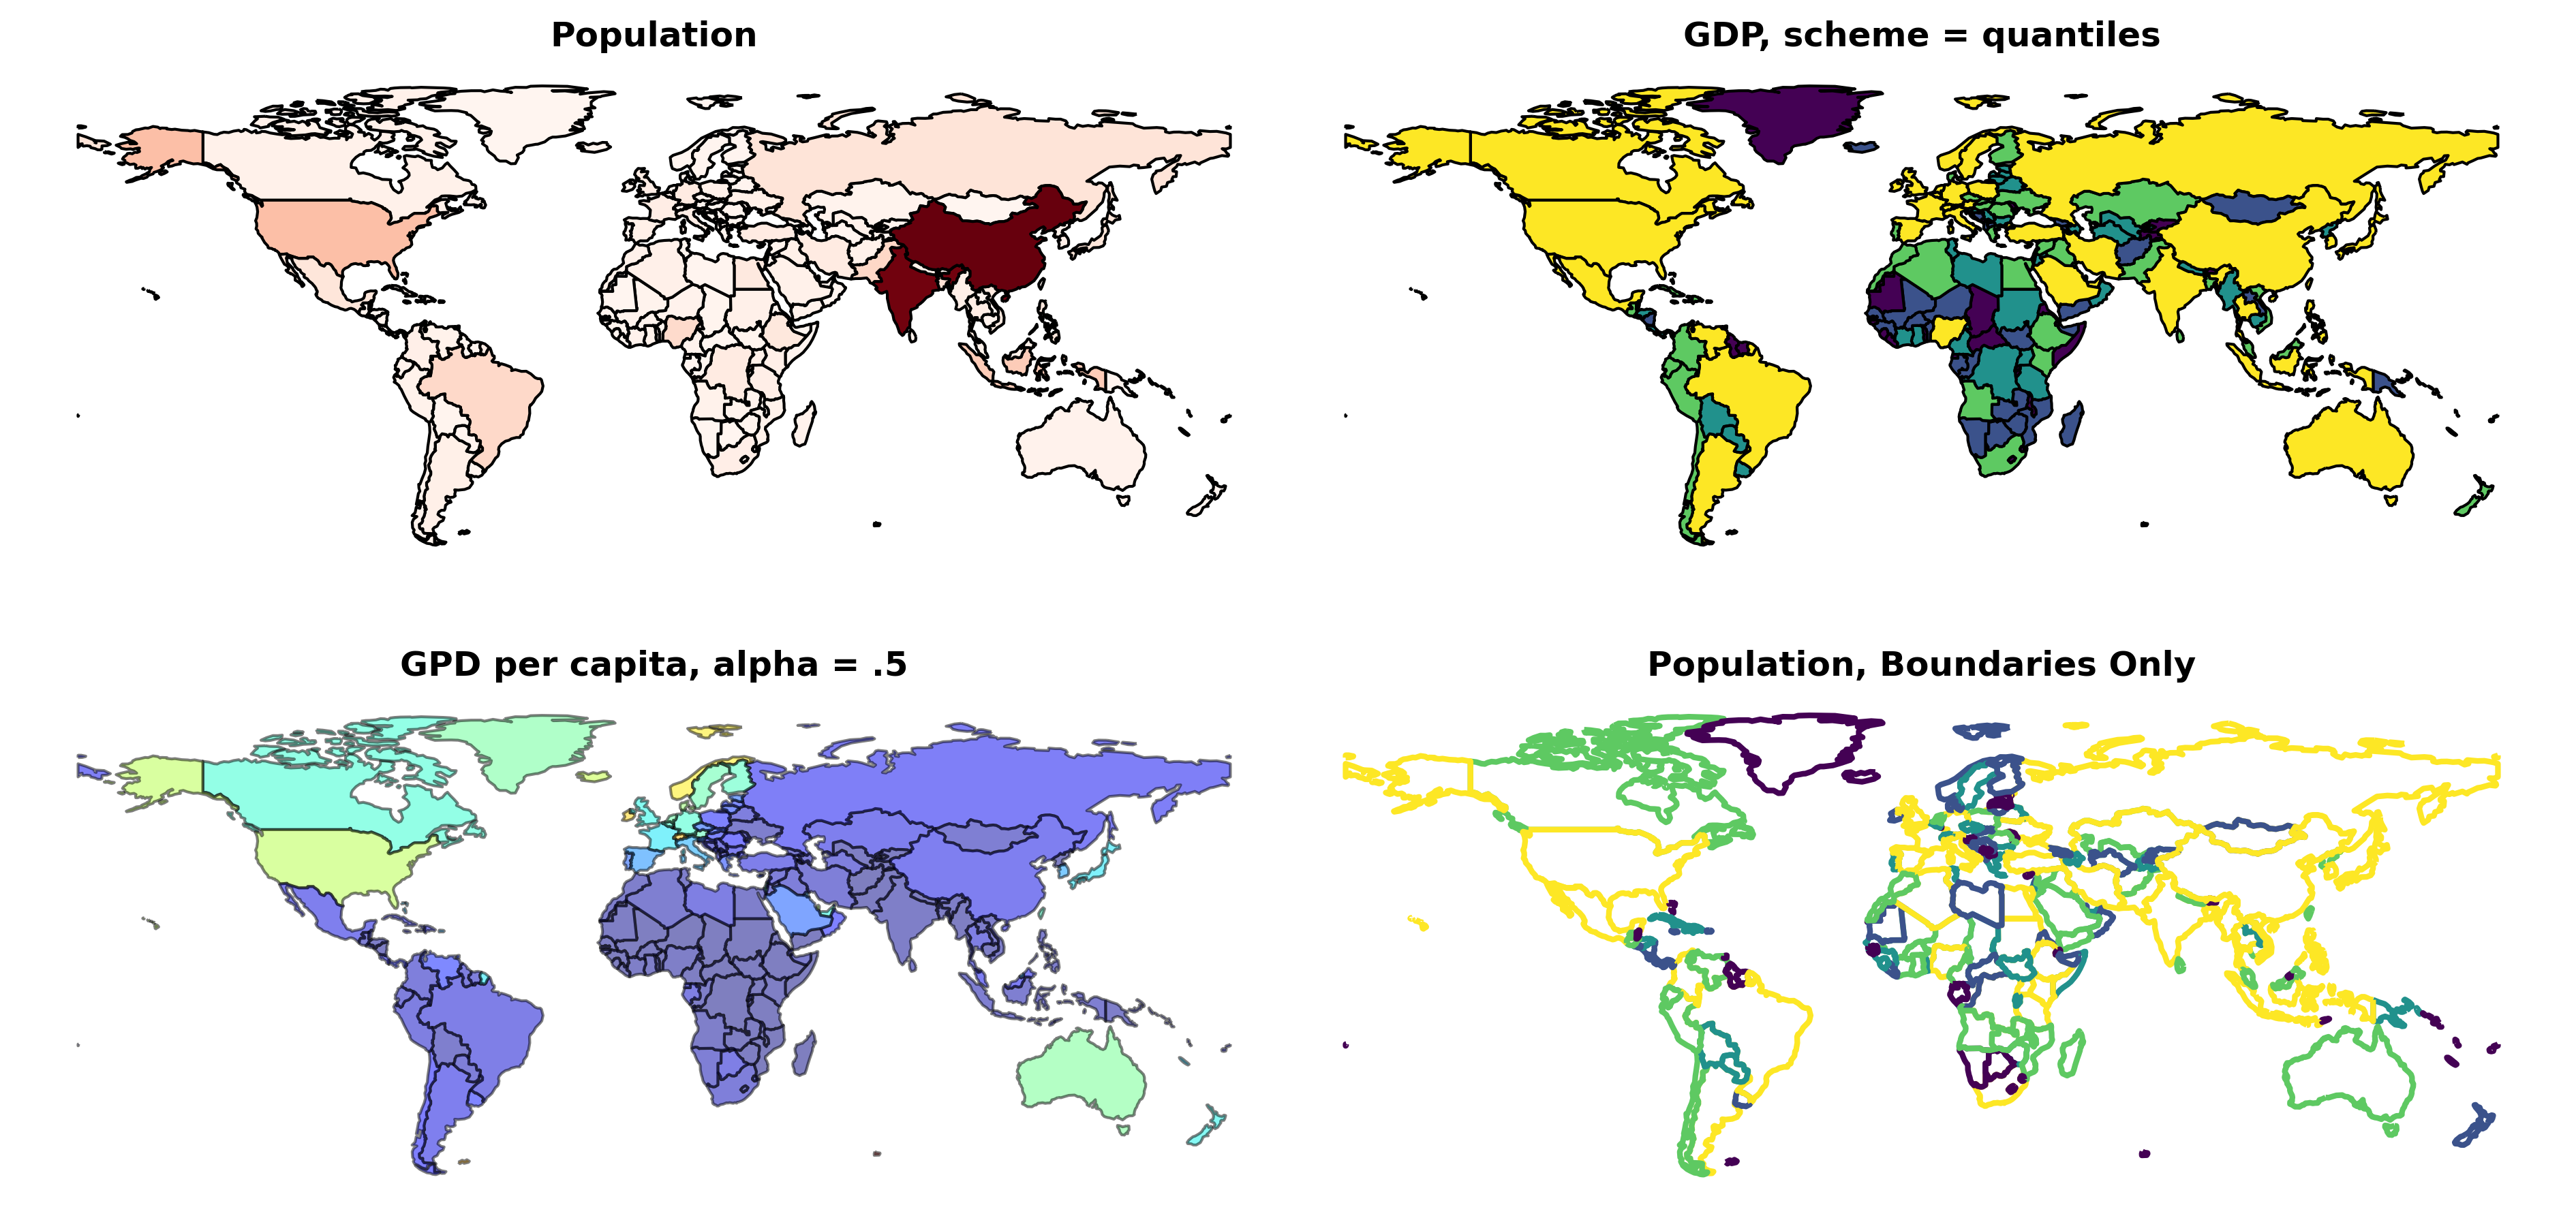

In [68]:
#Some more basic choropleth plots
####################

#Reload to remove NaNs:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Exclude Antarctica
gdf = gdf.loc[gdf.continent!='Antarctica']

#Make a gpd per capita column:
gdf['gpd_per_cap'] = gdf.gdp_md_est / gdf.pop_est


#Do a bunch of figures!
fig, ax1 = plt.subplots(2,2, figsize=(16, 8), dpi=300)
ax1 = ax1.flatten()

#Population
#####
gdf.plot(ax = ax1[0], column = 'pop_est', linewidth = 1, edgecolor = 'black', cmap = 'Reds')
ax1[0].set_title('Population', fontweight='bold')
ax1[0].set_axis_off();

#GDP
#####
gdf.plot(ax = ax1[1], column = 'gdp_md_est', linewidth = 1, edgecolor = 'black', cmap = 'viridis',
         scheme='quantiles')
ax1[1].set_title('GDP, scheme = quantiles', fontweight='bold')
ax1[1].set_axis_off();

#GDP per Capita
#####
gdf.plot(ax = ax1[2], column = 'gpd_per_cap', linewidth = 1, edgecolor = 'black', cmap = 'jet', alpha = .5)
ax1[2].set_title('GPD per capita, alpha = .5', fontweight='bold')
ax1[2].set_axis_off();

#Population, just the Boundaries
#####
gdf.plot(ax = ax1[3], facecolor='none', column = 'pop_est', linewidth = 2, cmap = 'viridis',
         scheme='quantiles')
ax1[3].set_title('Population, Boundaries Only', fontweight='bold')
ax1[3].set_axis_off();


#And adjust our subplots to be closer together
plt.subplots_adjust(wspace=0.0, hspace=0.0)


<AxesSubplot: >

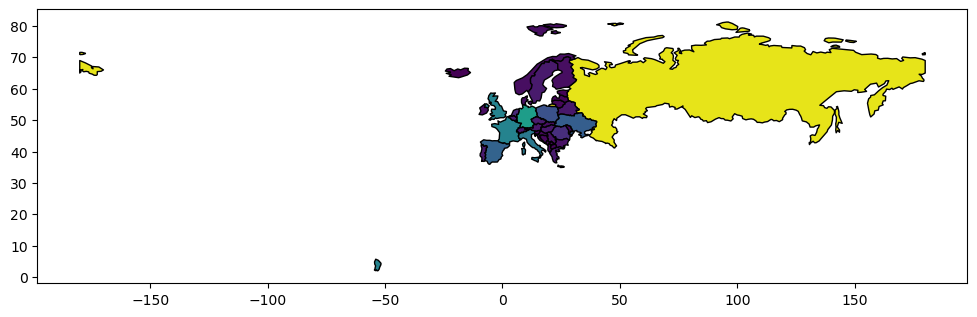

In [72]:
#Just Europe: Note vmin and vmax:
#####

gdf.loc[gdf.continent=='Europe'].plot(figsize=(12,8), column = 'pop_est', linewidth = 1, edgecolor = 'black', cmap = 'viridis',
        vmin=0, vmax=150e6)

<AxesSubplot: >

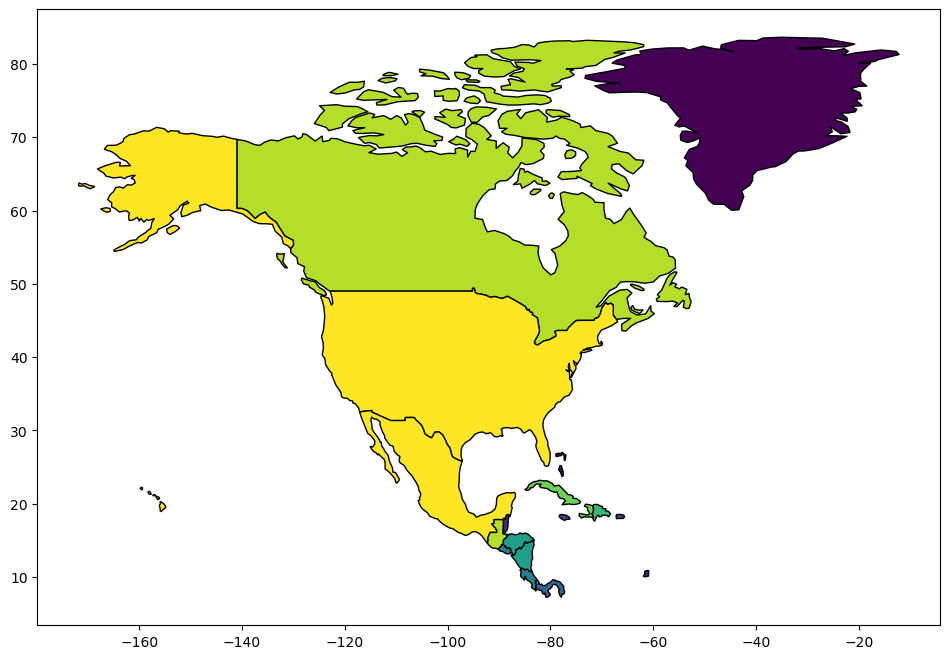

In [73]:
#Just North America
#####

gdf.loc[gdf.continent=='North America'].plot(figsize=(12,8), column = 'pop_est', linewidth = 1, edgecolor = 'black',
        cmap = 'viridis', scheme='quantiles', k=10) 

<AxesSubplot: >

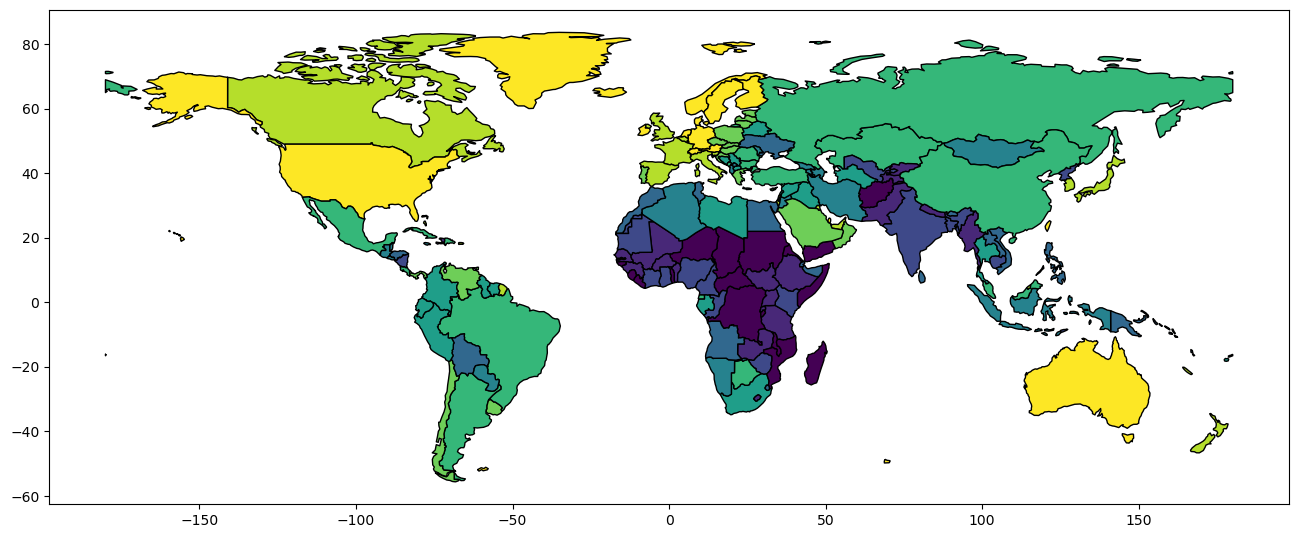

In [74]:
#Note, we don't actually need to create a new column/variable if we want a derived variable:
#Consider gdf
#Note also vmax and vmin
#####

gdf.plot(figsize=(16,8), column = gdf.gdp_md_est / gdf.pop_est, linewidth = 1, edgecolor = 'black', cmap = 'viridis',
         scheme='quantiles', k=10) 

<AxesSubplot: >

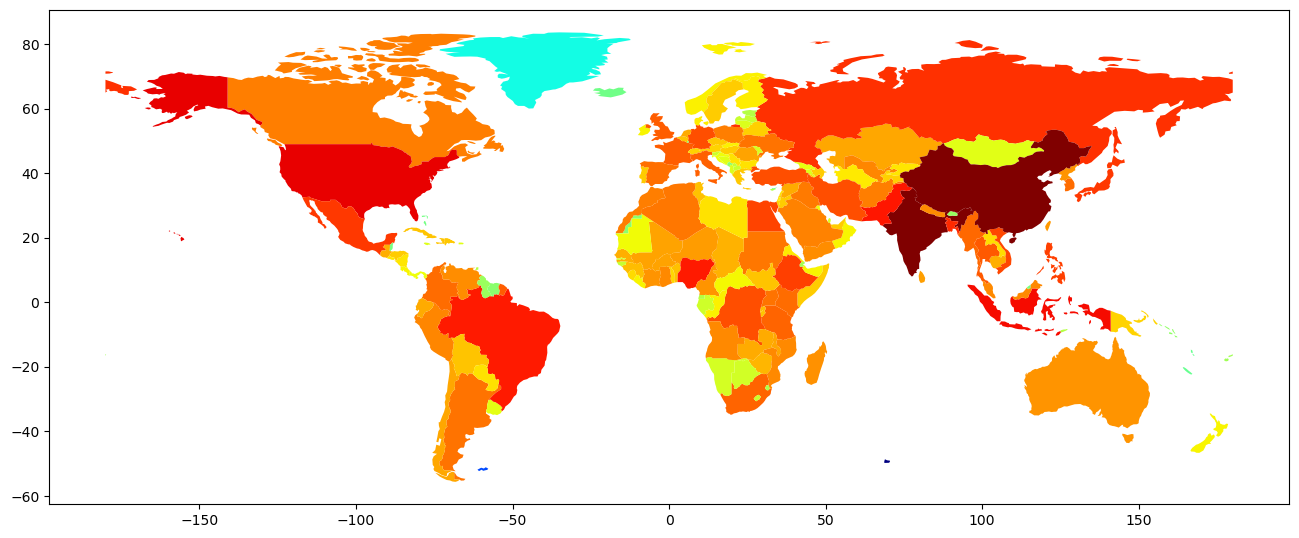

In [77]:
#Log scale
###########

gdf.plot(figsize=(16,8), column = np.log(gdf.pop_est), linewidth = 1, edgecolor = 'none', cmap = 'jet')

## Add a (Pretty) Colorbar

- To add a colorbar, we can just do the following, but it won't necessarily be very pretty:

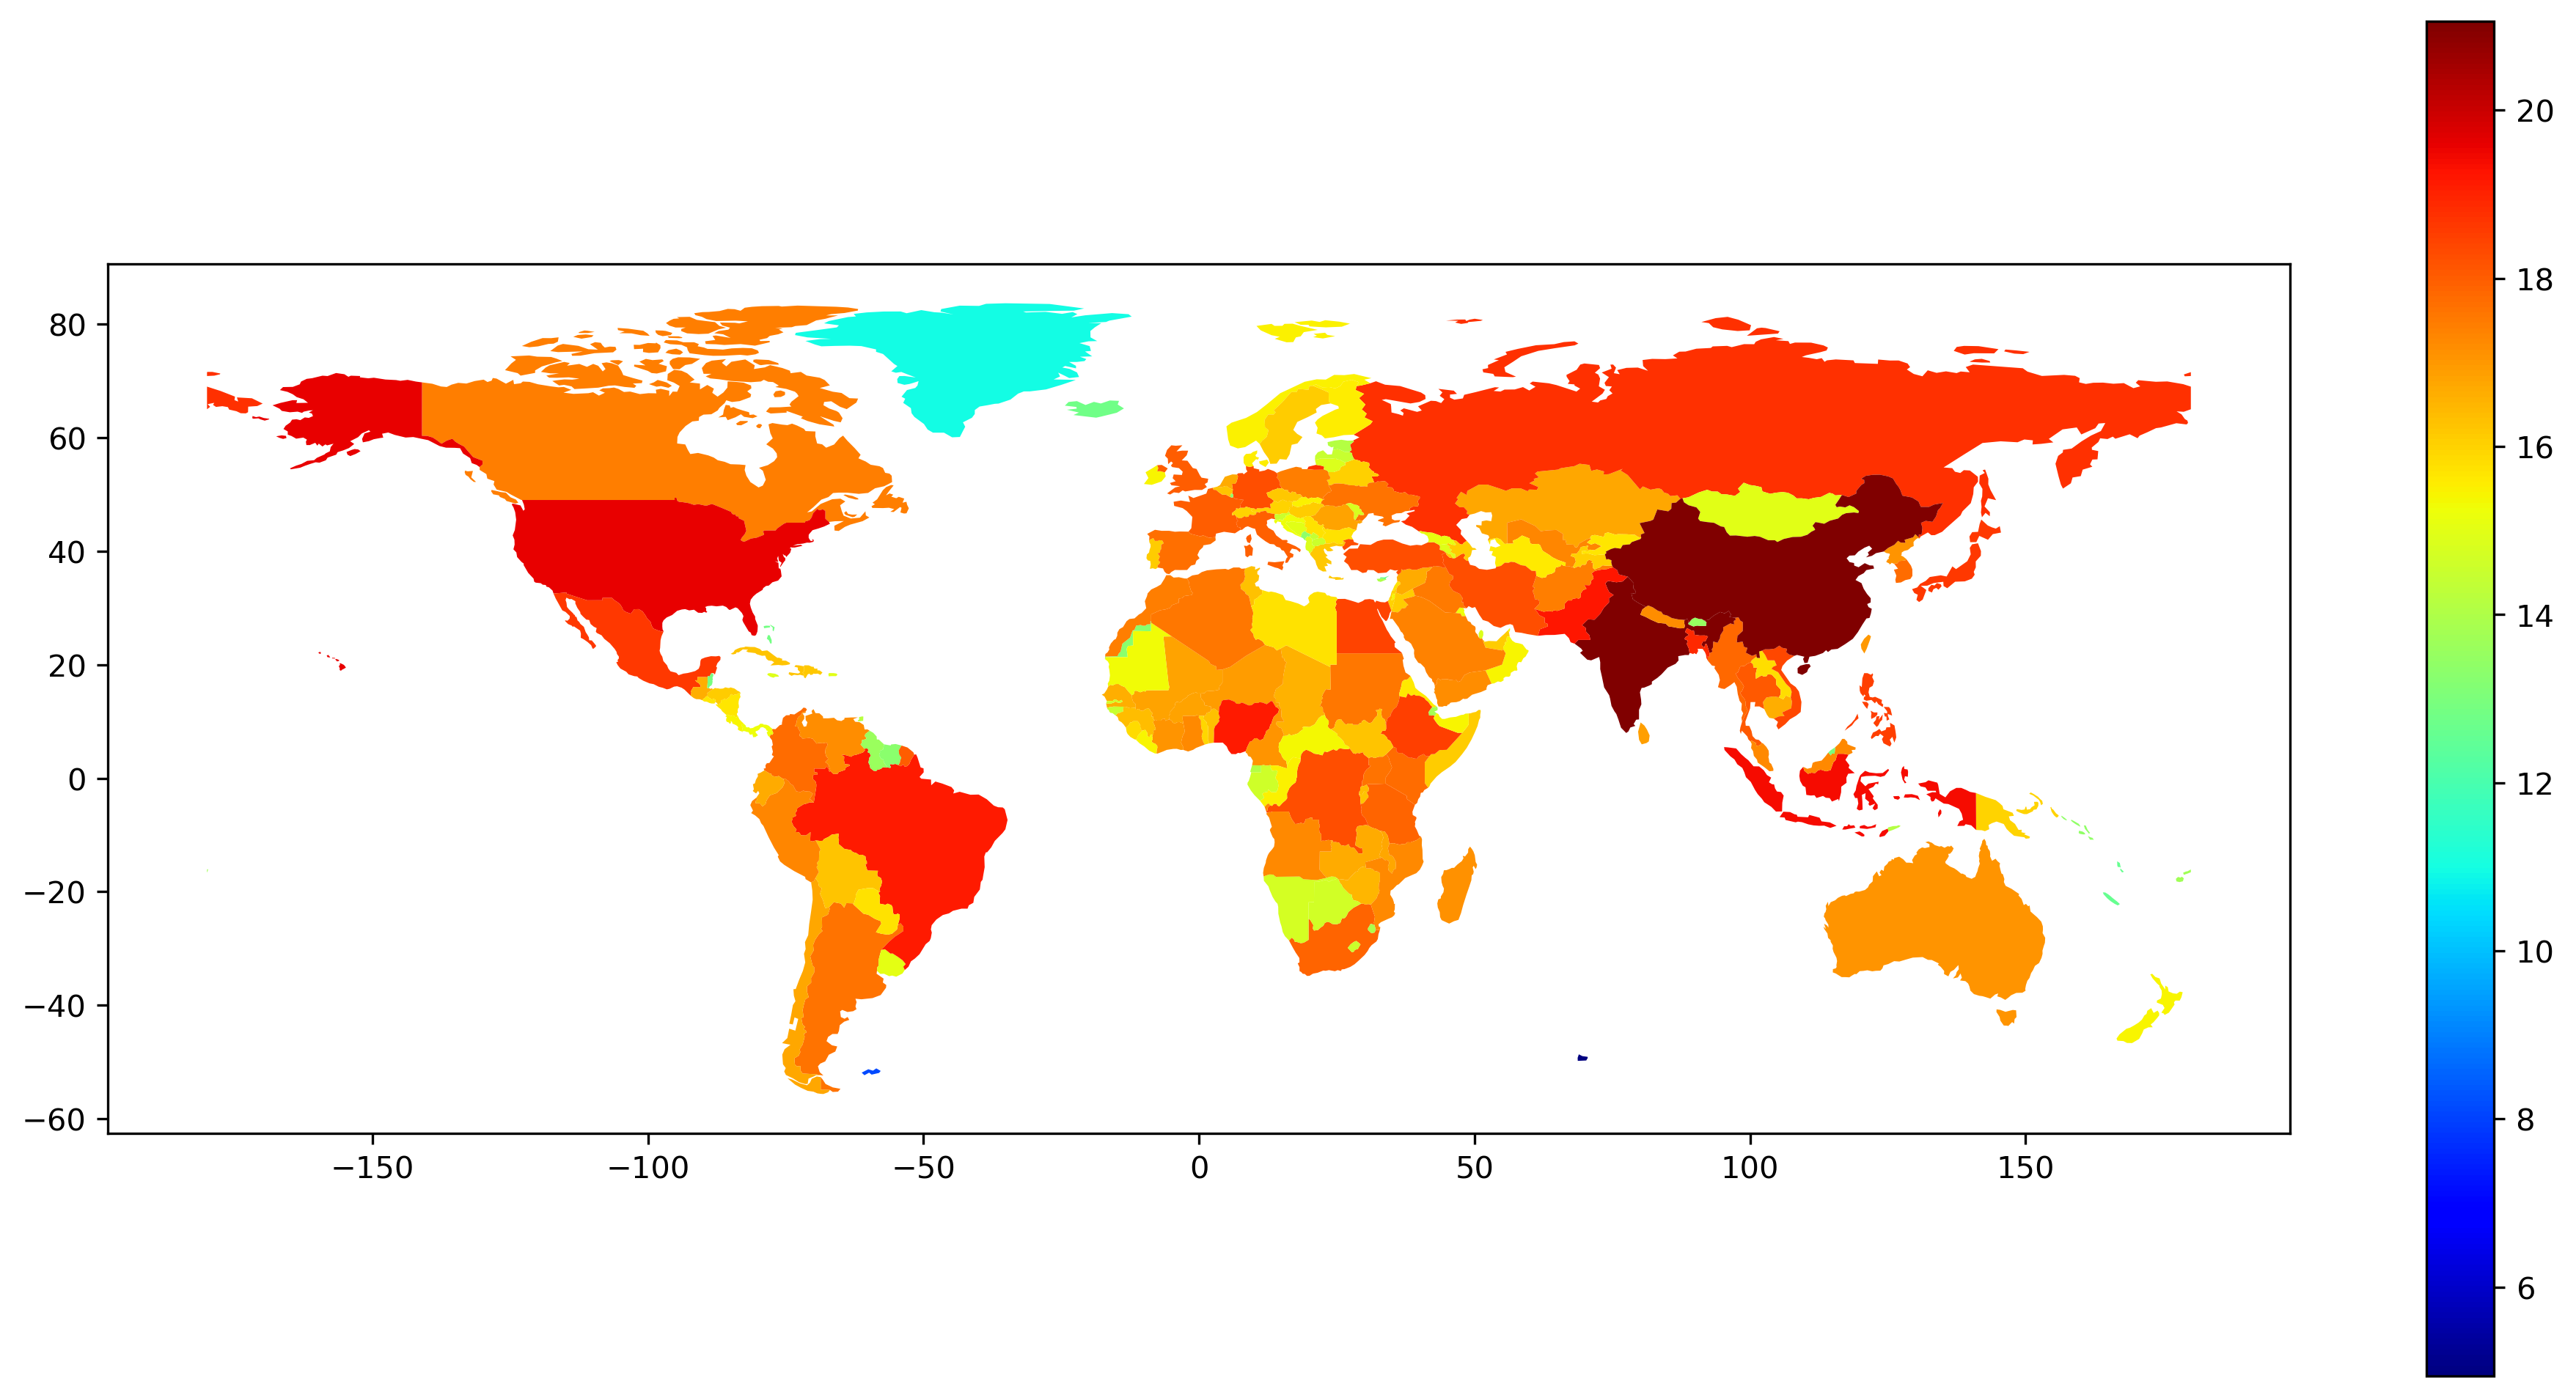

In [78]:
fig, ax1 = plt.subplots(1,1, figsize=(16, 8), dpi=300)

gdf.plot(ax=ax1, column = np.log(gdf.pop_est), linewidth = 1, edgecolor = 'none', cmap = 'jet', legend=True);

#### Make it pretty!

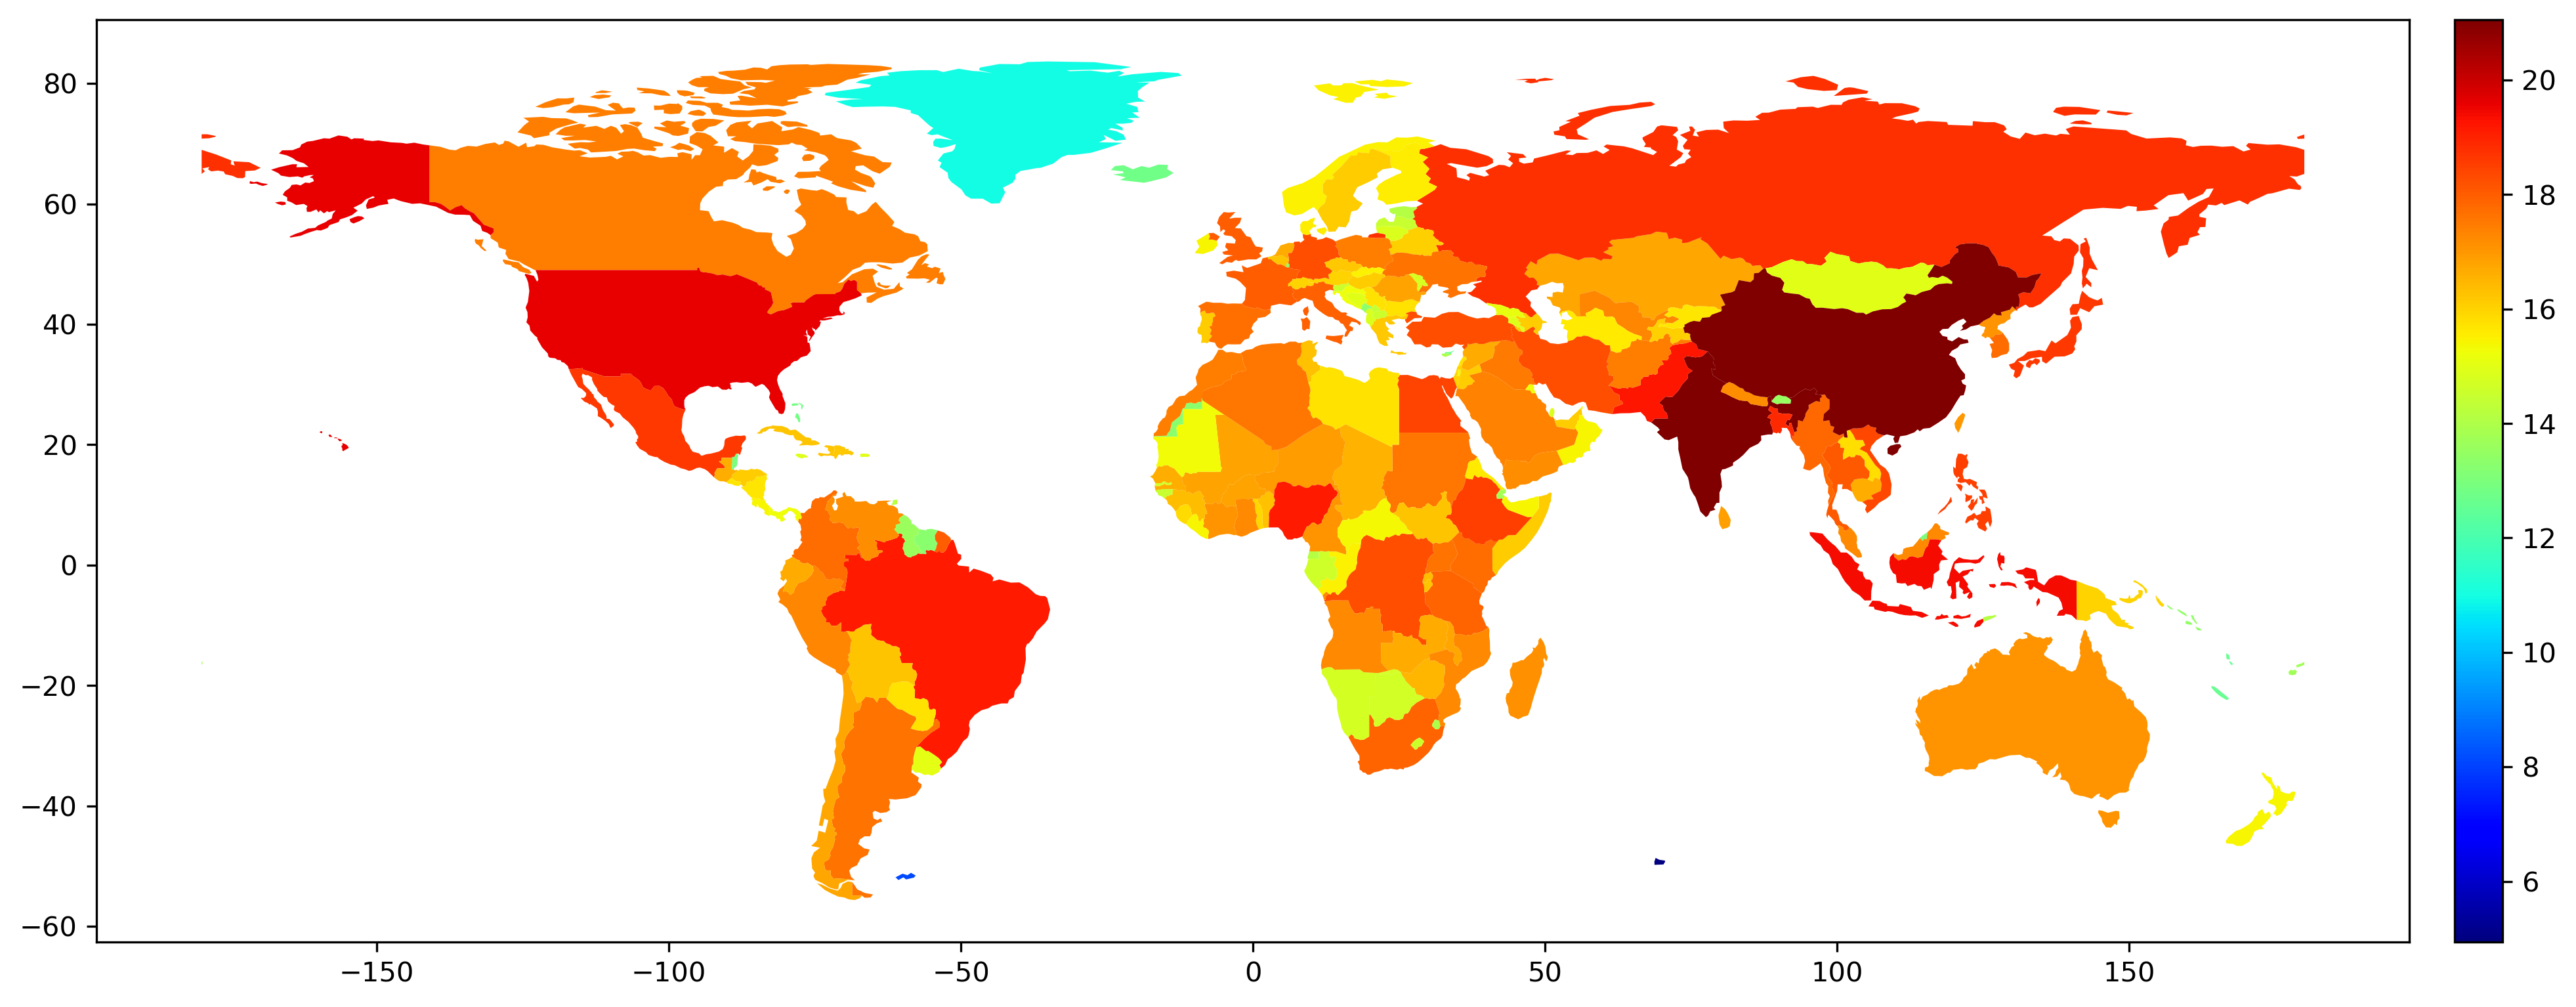

In [79]:
#For the pretty colorbar:
#####

from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax1 = plt.subplots(1, 1, figsize=(16, 12), dpi=300)


#Set up our axis for the colorbar:
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="2%", pad=.05)

#And like so:
gdf.plot(ax=ax1, column = np.log(gdf.pop_est), linewidth = 1, edgecolor = 'none', cmap = 'jet',
         legend=True, cax=cax);


## Coordinate Reference System and Centroids

- Plot our population data using several different coordinate reference systems and using centroids

In [89]:
#Plot each country centroid under different CRS
############################

gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Drop Antarctica again:
gdf = gdf.loc[gdf.continent!='Antarctica']

#First, just look at default CRS:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [90]:
##Also note the type: A pyproj CRS object
type(gdf.crs)

pyproj.crs.crs.CRS

In [91]:
#Note the attributes:
#######

dir(gdf.crs)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'srs',
 'sub_crs_list',
 'targ

In [92]:
gdf.crs.is_projected

False

#### EPSG Codes

- European Petroleum Survey Group (EPSG) codes are convenient for changing CRS, as below:

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

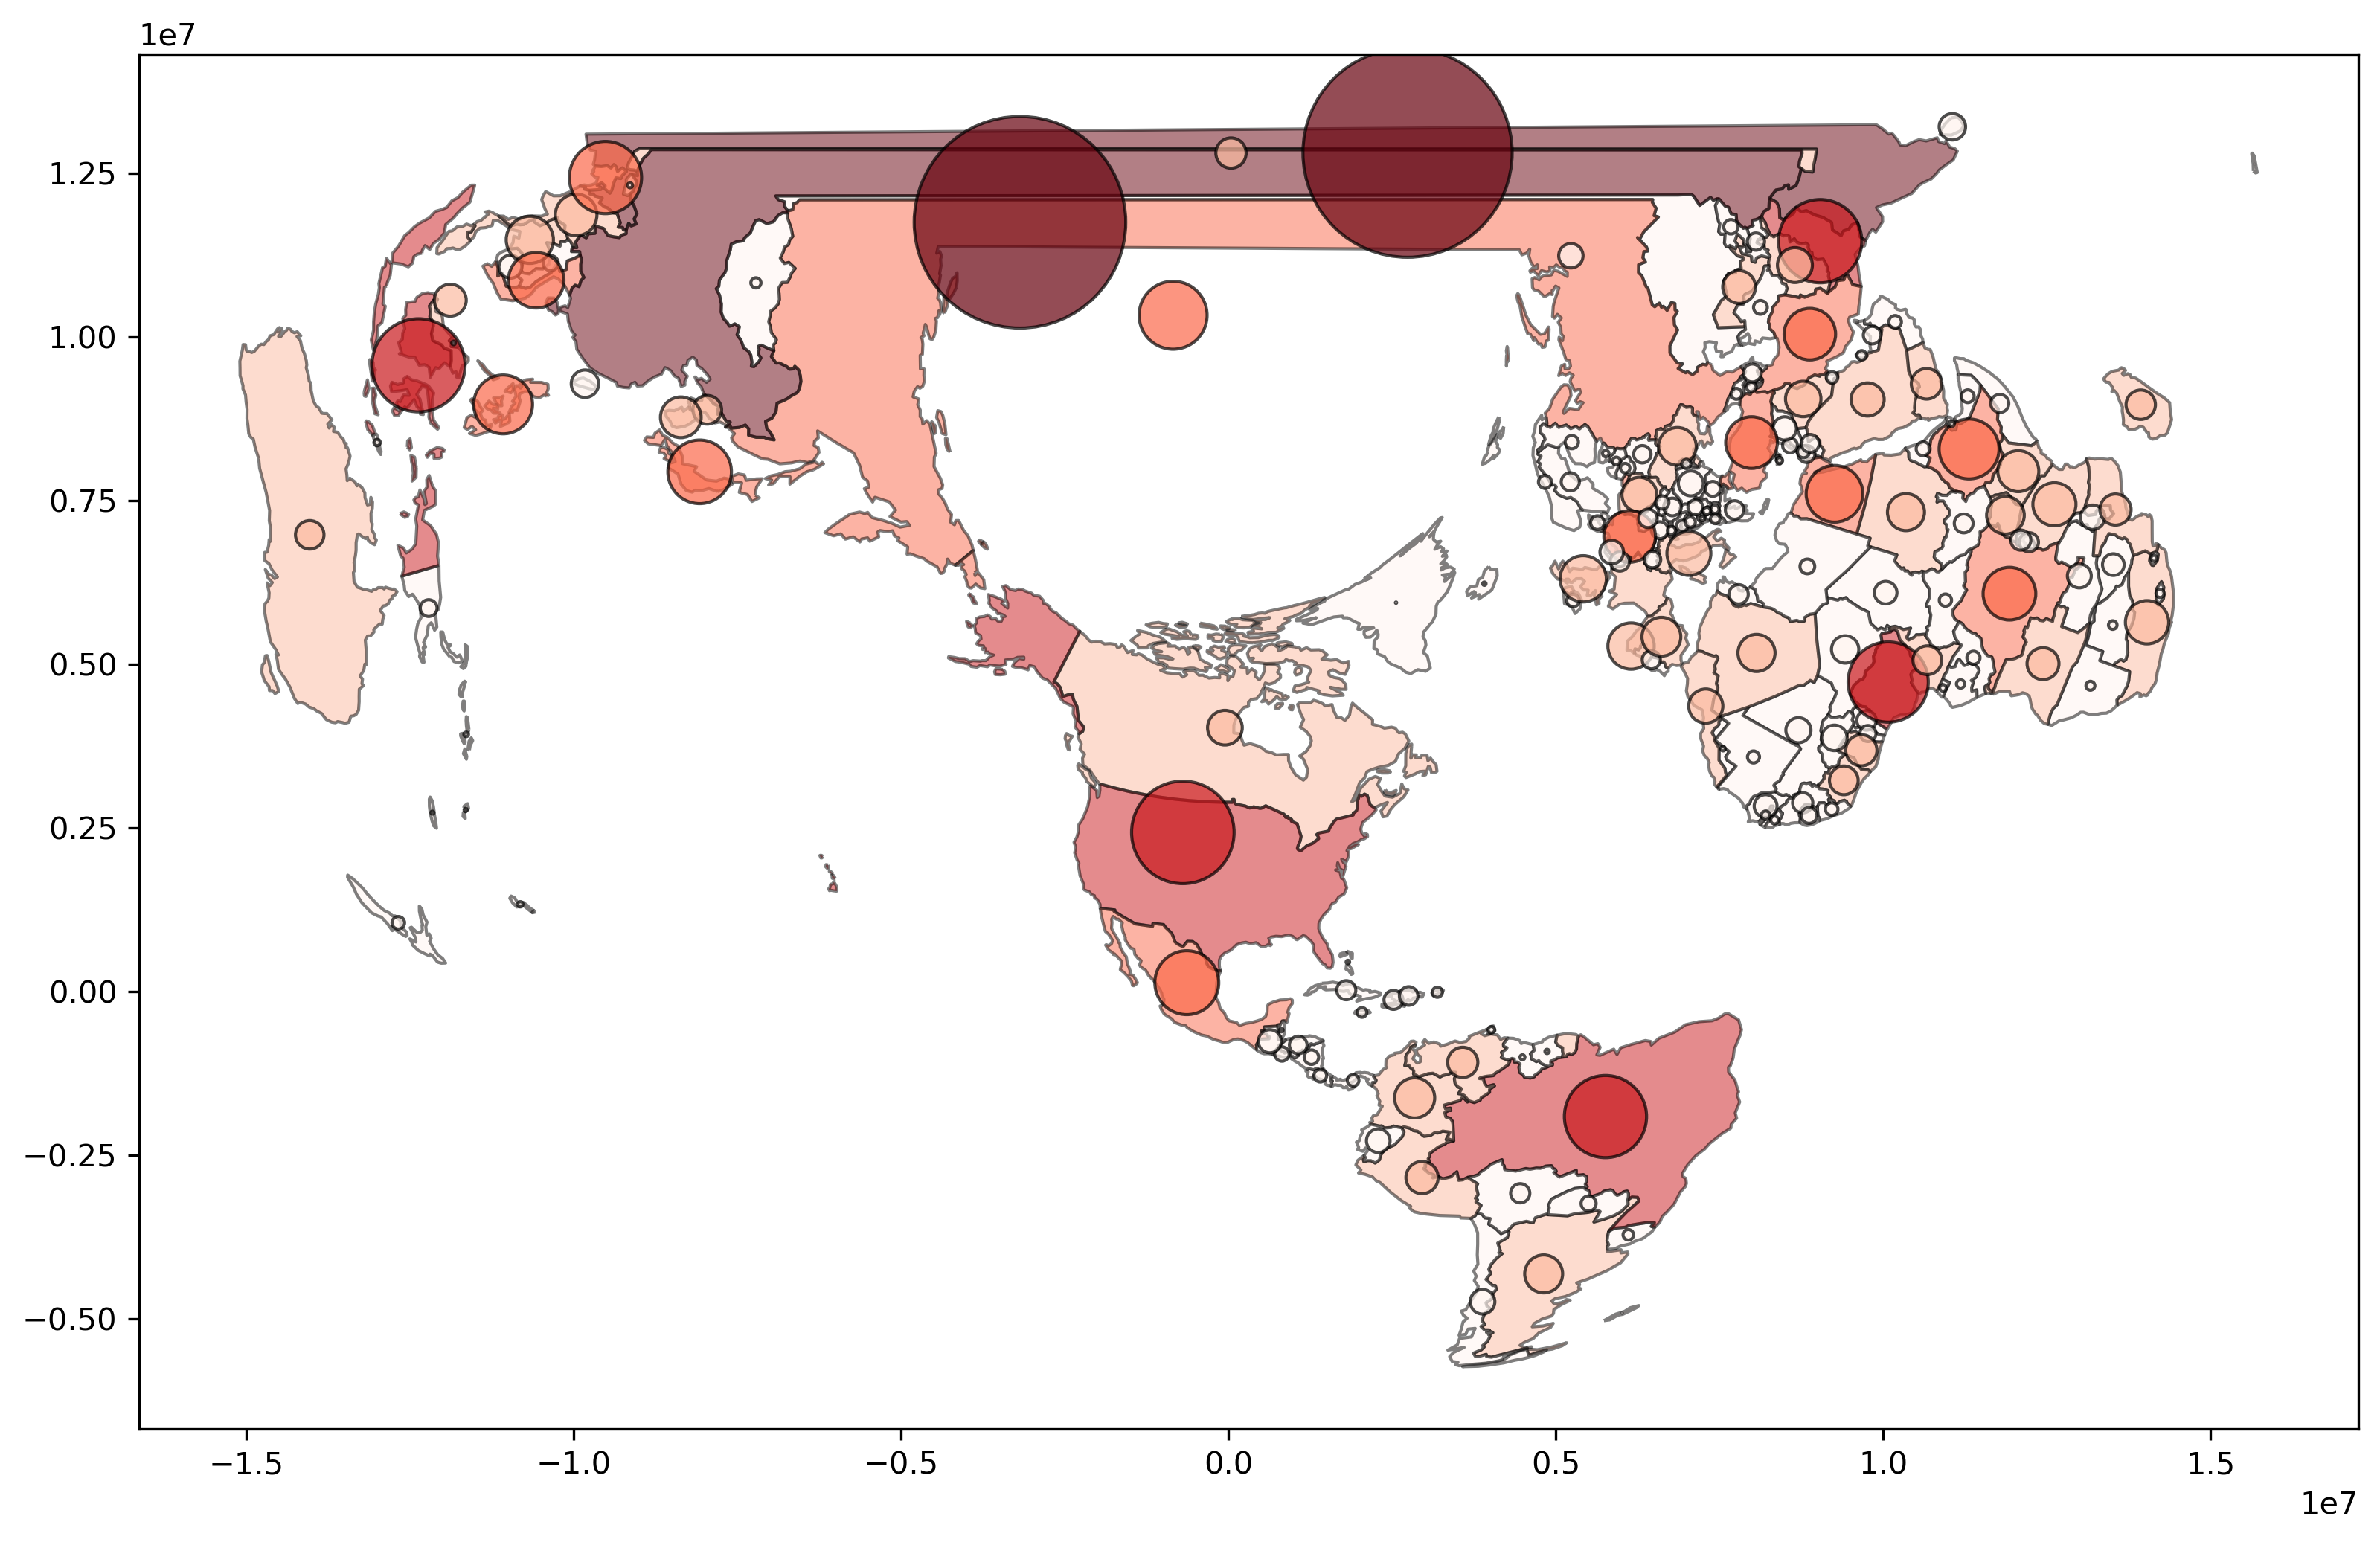

In [95]:
#Now plot with centroids...
####

#Try a few different CRS EPSG codes:
#4326 = Geographic 2D, WGS 84 Daturm
#4269 = Geographic 2D, NAD83 Datum
#3857 = Mercator (Cylindrical projection)
#5070 = North American Albers Equal Area (Conic)
#6933 = Equal-Area Cylindrical
#3035 = Lambert Azimuthal Equal Area centered on Europe (Azimuthal/Planar)

#################
gdf = gdf.to_crs(5070) 

display(gdf.crs)

#Copy and get centroids:
#################
gdf['centroid_column'] = gdf.centroid

gdf2 = gdf.copy()

#We can set geometry:
gdf2 = gdf2.set_geometry('centroid_column')


fig1, ax1 = plt.subplots(1,1, figsize=(16, 8), dpi=300)

#Try changing scheme:
###

#Plot polygons:
######
gdf.plot(ax = ax1, column = 'pop_est', alpha = .5, linewidth=1, edgecolor = 'black', cmap='Reds', scheme='fisherjenks')

#Plot centroids:
#######
gdf2.plot(ax = ax1, column = 'pop_est', markersize = gdf2.pop_est / 3e5,
          alpha = .7, edgecolor = 'black', cmap='Reds', scheme='fisherjenks');


<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

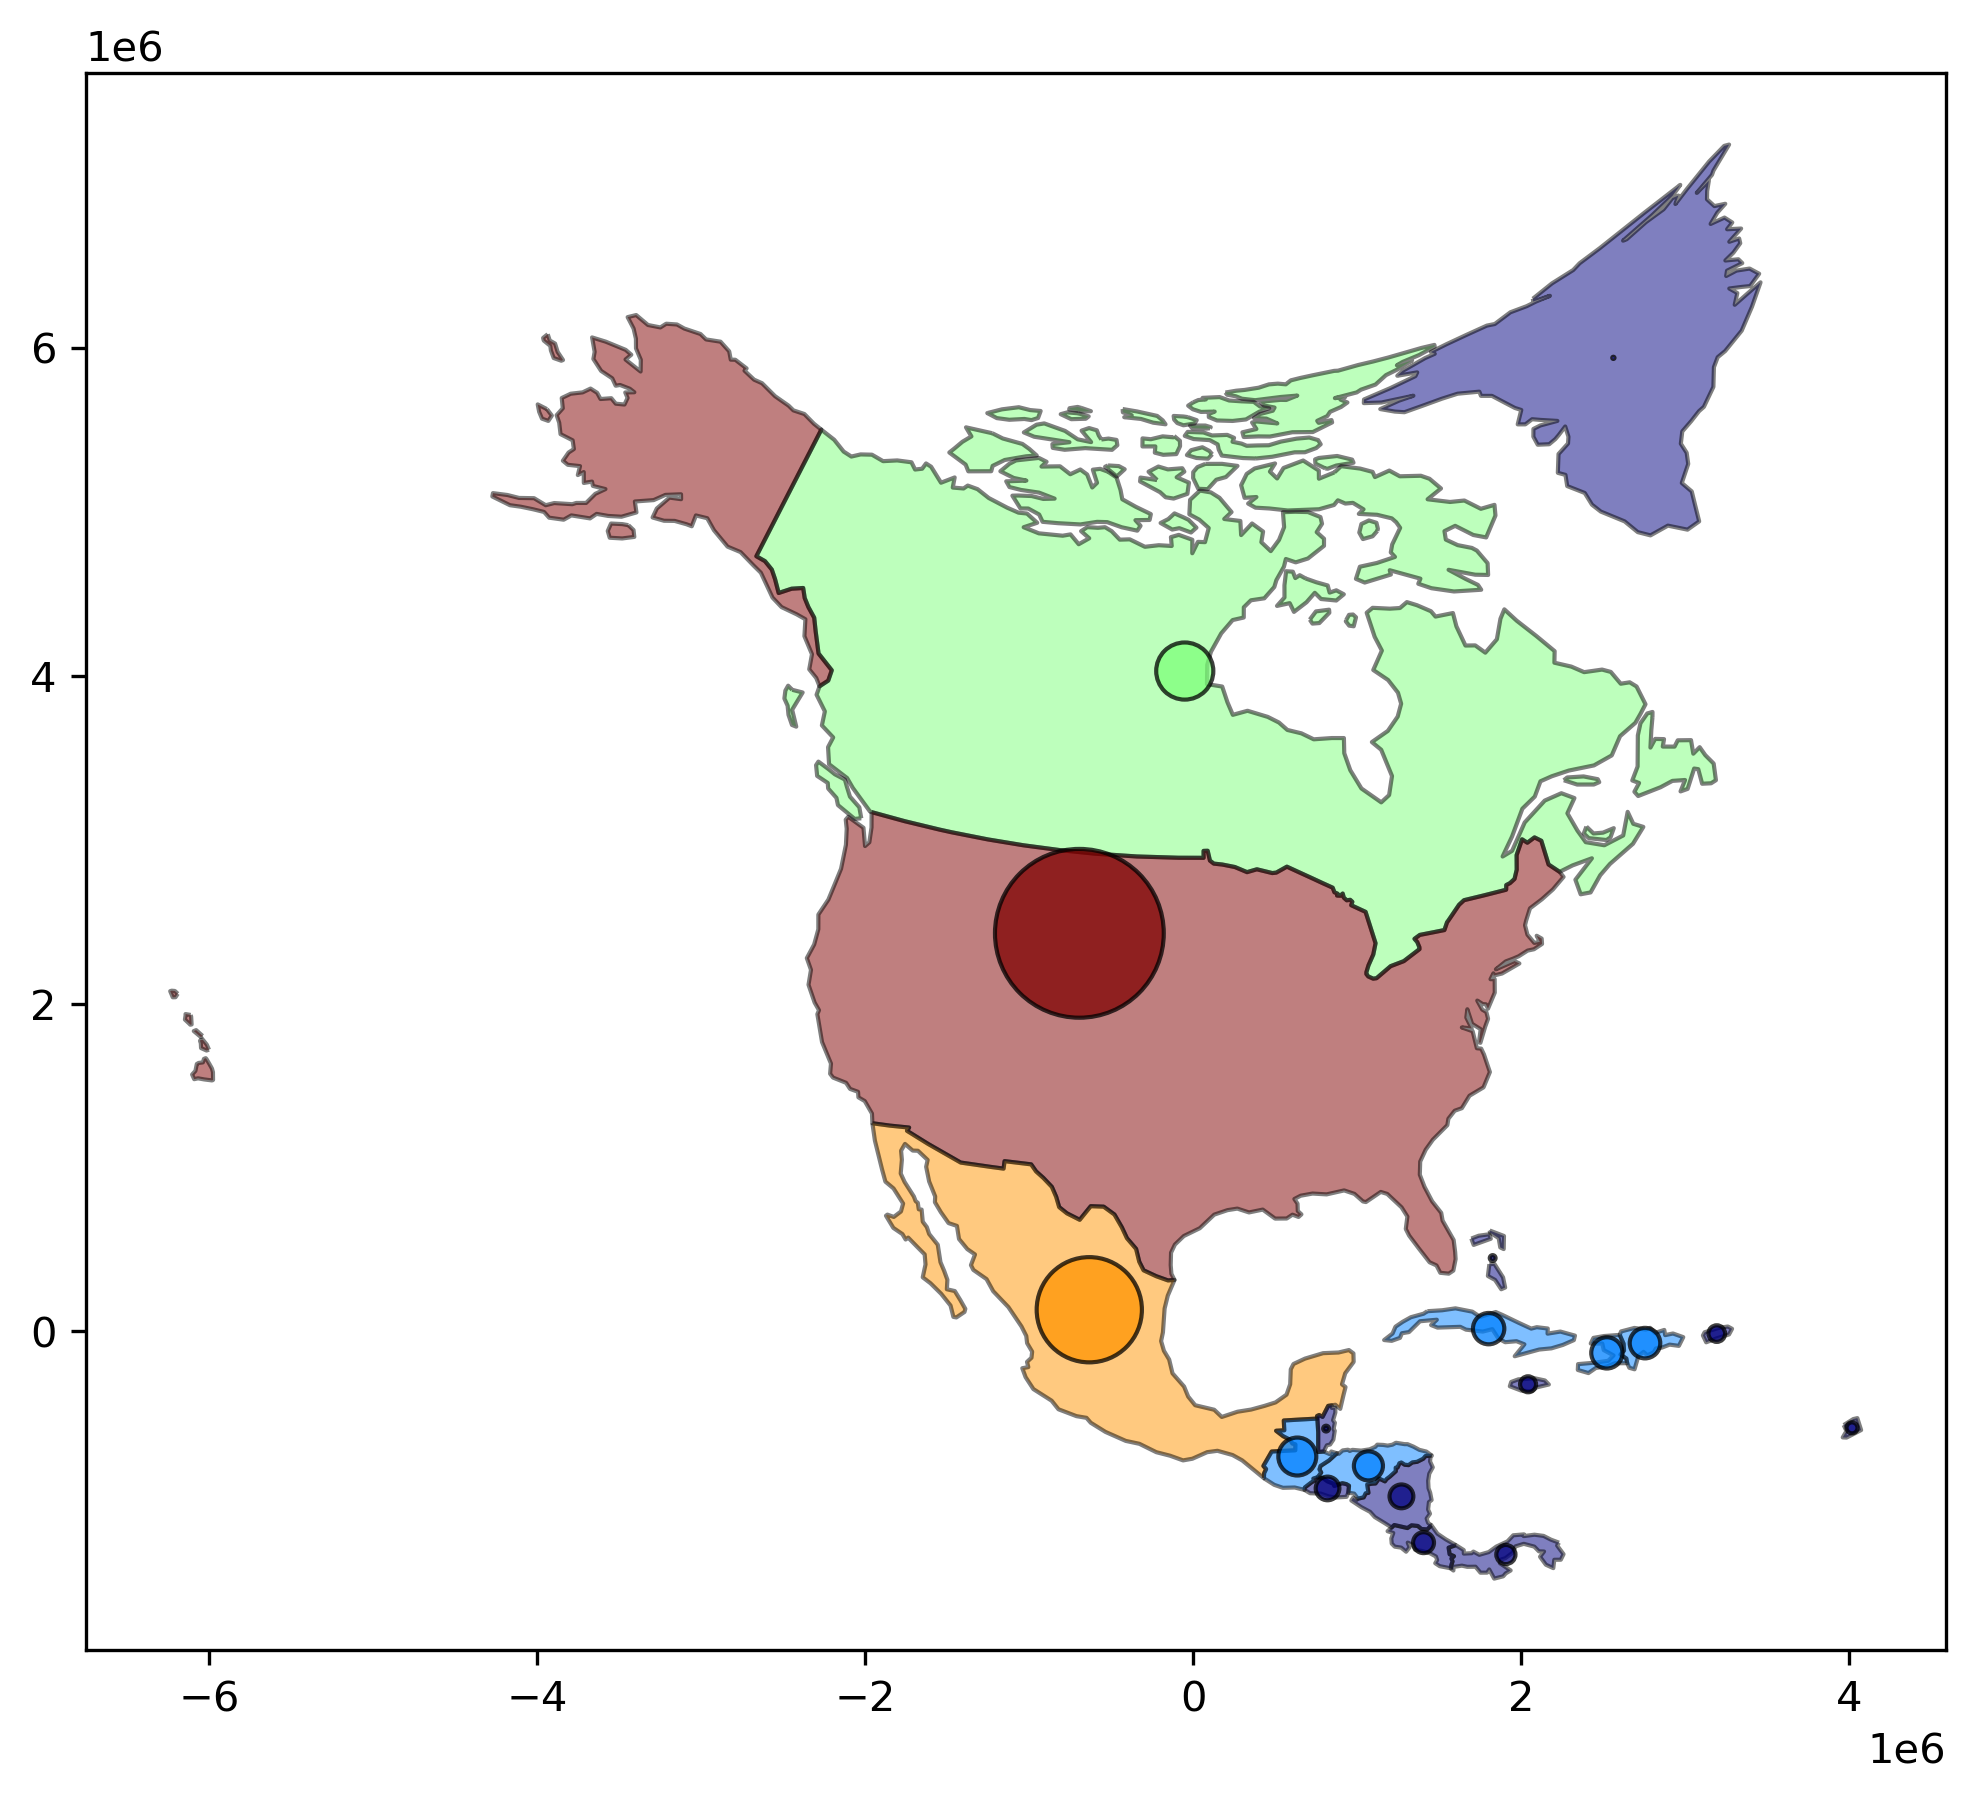

In [94]:
#For 5070, filter to just North America
#########

gdf_na = gdf.loc[gdf.continent == 'North America']

gdf_na = gdf_na.to_crs(5070) 
gdf_na['centroid_column'] = gdf_na.centroid

display(gdf_na.crs)

#And plot:
#Plot polygons:
######
fig1, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)

gdf_na.plot(ax = ax1, column = 'pop_est', alpha = .5, linewidth=1, edgecolor = 'black', cmap='jet', scheme='fisherjenks')

#Plot centroids:
#######
gdf_na= gdf_na.set_geometry('centroid_column')
gdf_na.plot(ax = ax1, column = 'pop_est', markersize = gdf_na.pop_est / 2e5, alpha = .75, edgecolor = 'black', cmap='jet', scheme='fisherjenks');



### Let's add some cities: Point Geometries

- Now we'll have a point geometry
- Can use `naturalearth_cities`

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

name                    geometry
0  Vatican City   POINT (12.45339 41.90328)
1    San Marino   POINT (12.44177 43.93610)
2         Vaduz    POINT (9.51667 47.13372)
3       Lobamba  POINT (31.20000 -26.46667)
4    Luxembourg    POINT (6.13000 49.61166)

<AxesSubplot: >

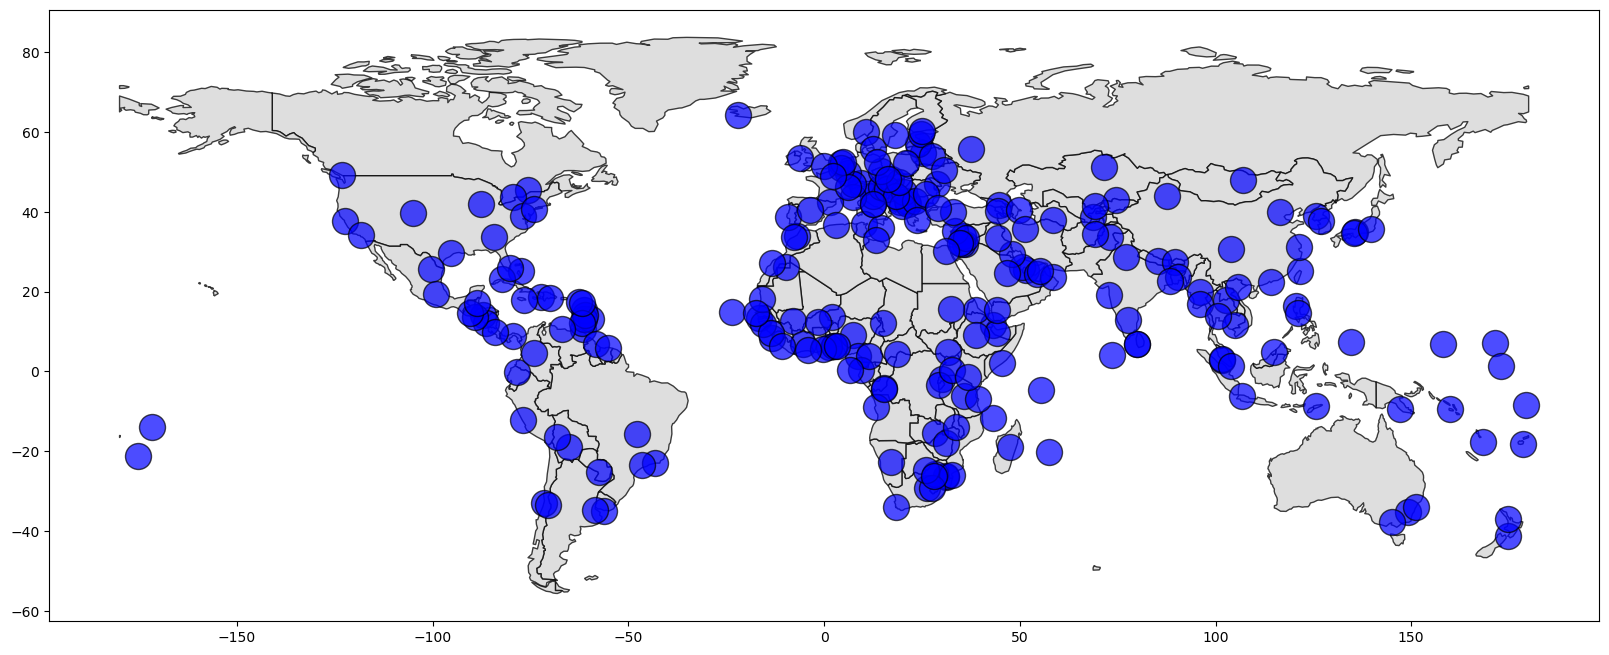

In [97]:

#Get world borders again
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Now, get the cities!
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

#Get rid of Antarctica
world = world.loc[world.continent!='Antarctica']


#Confirm same CRS
display(world.crs)
display(cities.crs)

#See what cities is like:
display(cities.head())


#Plot the cities and country borders
######
fig, ax1 = plt.subplots(1,1, figsize=(20, 10))

#Country backgrounds
world.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black', alpha=.75)

#Cities
#Note: Try changing the zorder for both plots
cities.plot(ax = ax1, markersize = 350, facecolor='blue', edgecolor='black',
            alpha=.7, zorder=1) #, zorder=1);

### Make your own points/GeoDataFrame

- Create a random DataFrame of Points:

In [101]:
#Make a GeoDataFrame of N random points:
N = 50
df = pd.DataFrame(
    {'Name': [str(k) for k in (list(range(0, N)))],
     'Latitude': np.random.randint(-89, 89, N),
     'Longitude': np.random.randint(-180, 180, N),
     'Value': np.random.uniform(50, 300, N)})

df.head()

Name  Latitude  Longitude       Value
0    0        38       -114   53.329200
1    1        31       -146   57.003647
2    2       -70        114  201.416799
3    3       -41        173  262.265875
4    4       -37         21   51.097733

In [102]:
#Make a GeoDataFrame of N random points:
#Create the GeoDataFrame
#Always start with EPSG 4326 (or 4269):

gdf_point = gpd.GeoDataFrame(df[['Name', 'Value', 'Latitude', 'Longitude']],
            geometry = gpd.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")

display(gdf_point.head())


Name       Value  Latitude  Longitude                     geometry
0    0   53.329200        38       -114  POINT (-114.00000 38.00000)
1    1   57.003647        31       -146  POINT (-146.00000 31.00000)
2    2  201.416799       -70        114  POINT (114.00000 -70.00000)
3    3  262.265875       -41        173  POINT (173.00000 -41.00000)
4    4   51.097733       -37         21   POINT (21.00000 -37.00000)

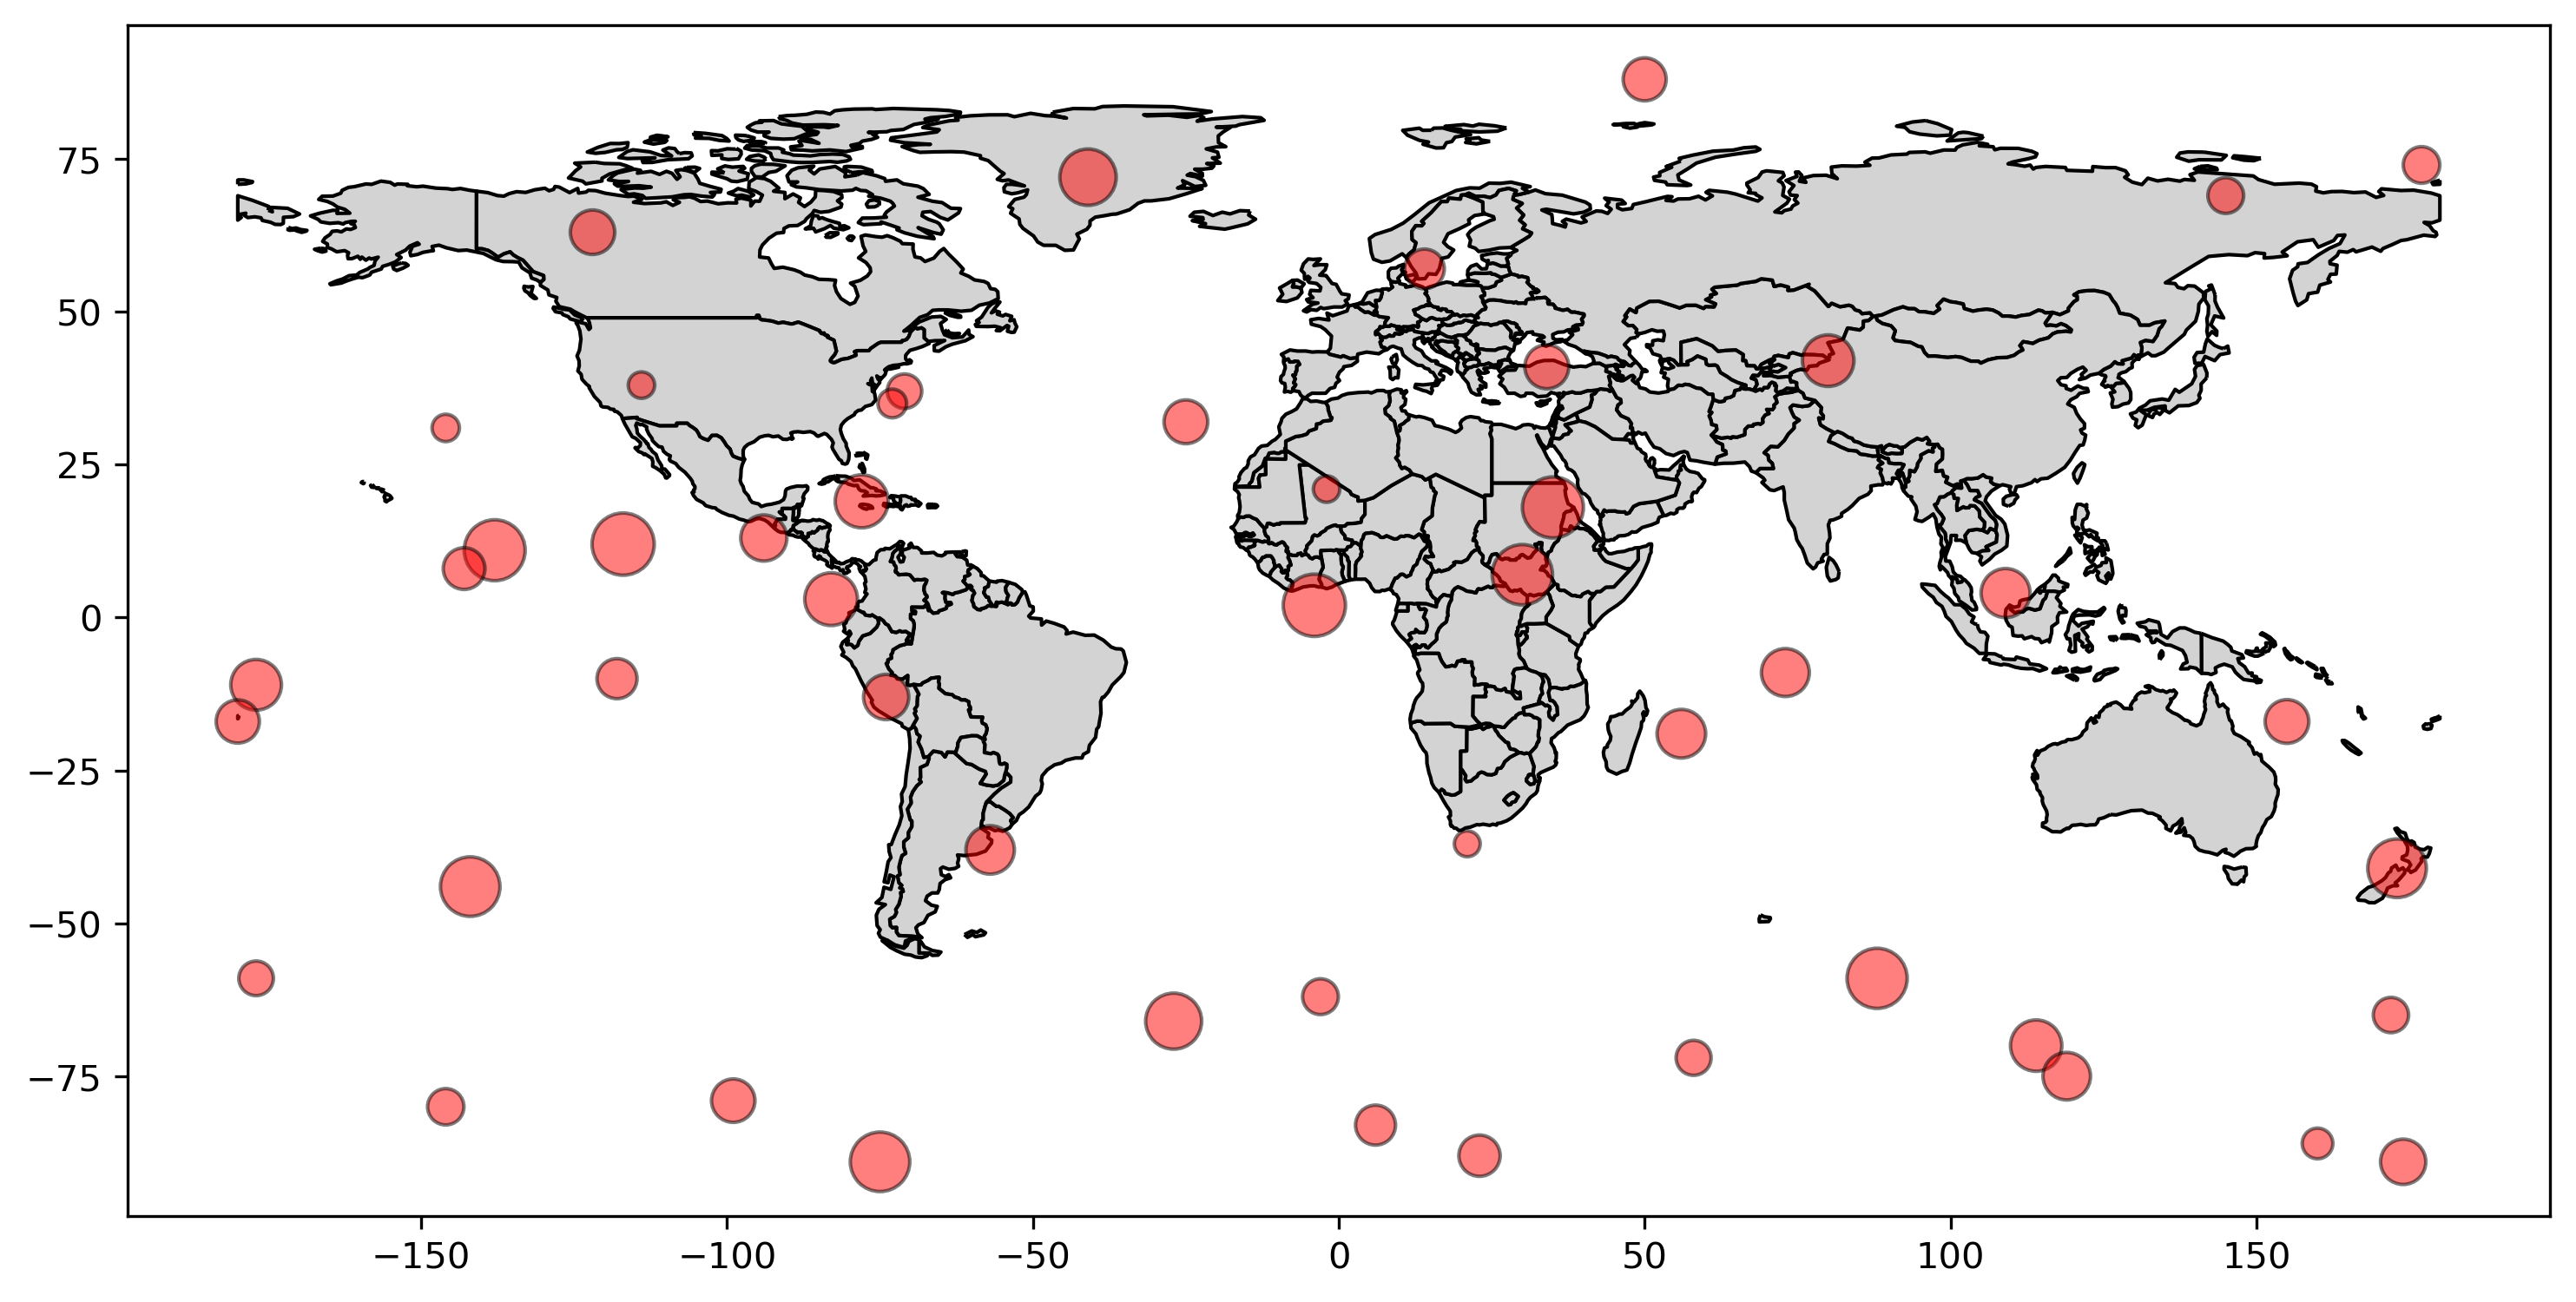

In [103]:
#And plot:
#########

fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)

world.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
gdf_point.plot(ax = ax1, markersize = 'Value', color='red', edgecolor='black', alpha=.5);


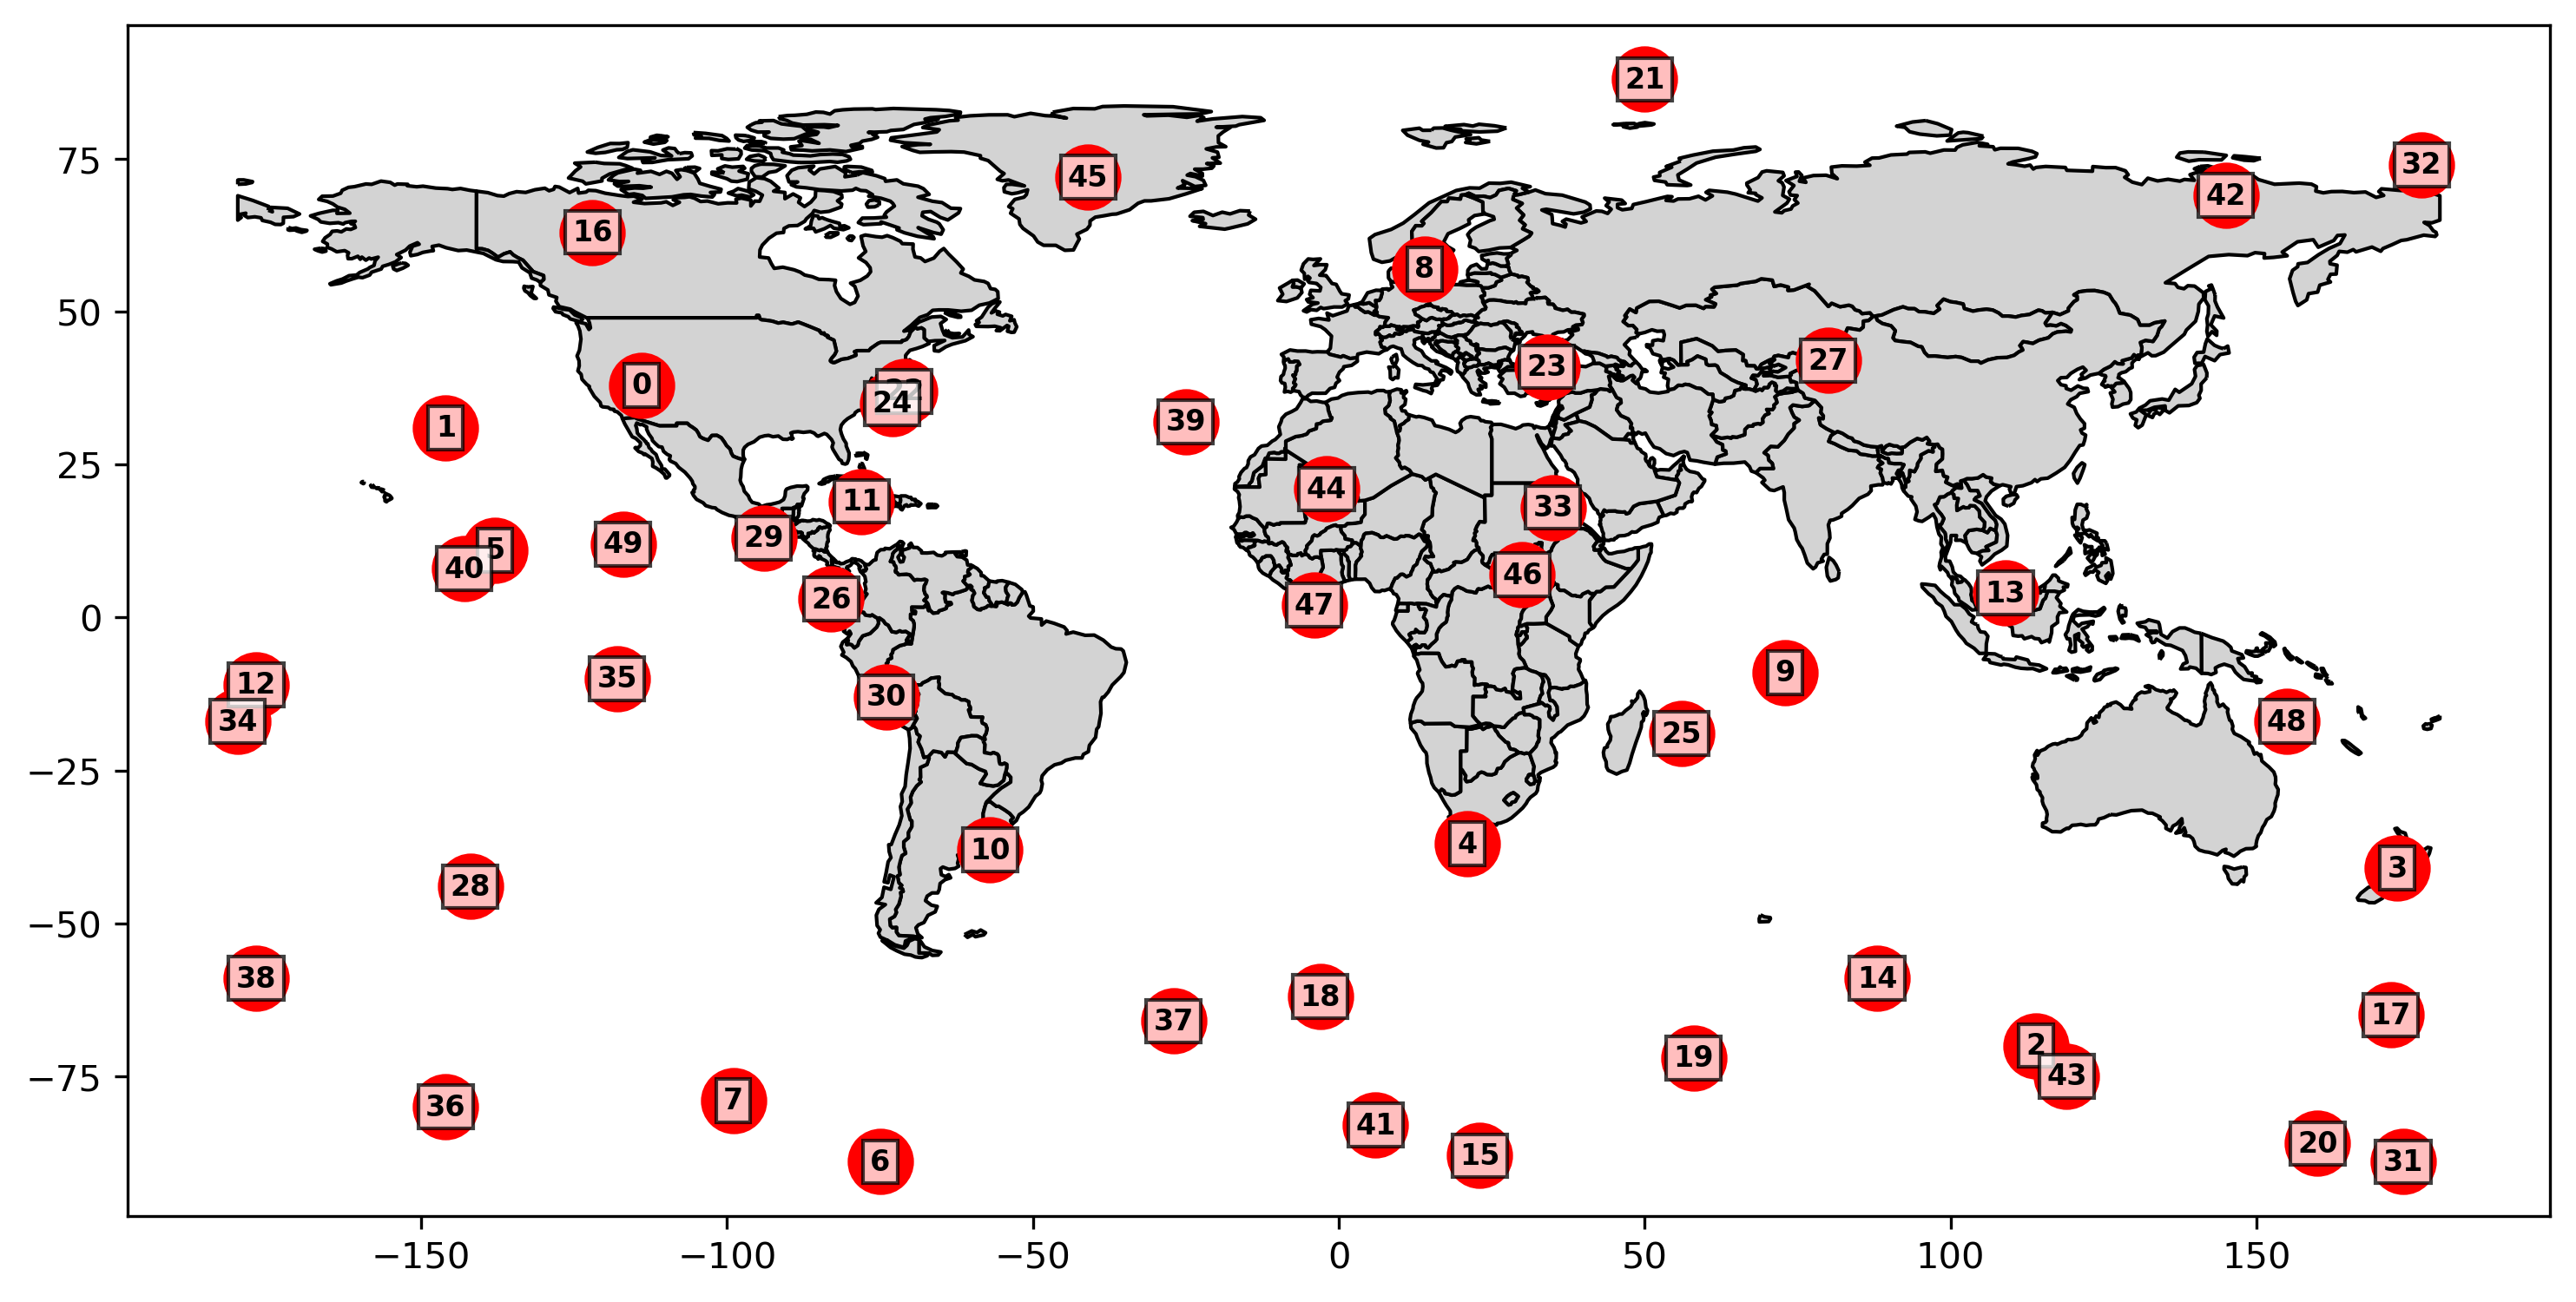

In [105]:
### Add Text:
########

#Get our base plot:
fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)

world.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
gdf_point.plot(ax = ax1, markersize = 300, color='red');


#What if we didn't have Latitude/Longitude columns?
#######

for i, p in enumerate(gdf_point.geometry):
    #Observe:
    #print(p.coords.xy[0][0])
    
    #Or just:
    #print(p.x)

    #Plot:
    text_str = gdf_point.iloc[i].Name

    ax1.text(p.x, p.y, text_str, fontsize=8, fontweight='bold', color='black',
             bbox={'facecolor':'white','alpha':.75,'edgecolor':'black','pad':2},
             ha='center', va='center')

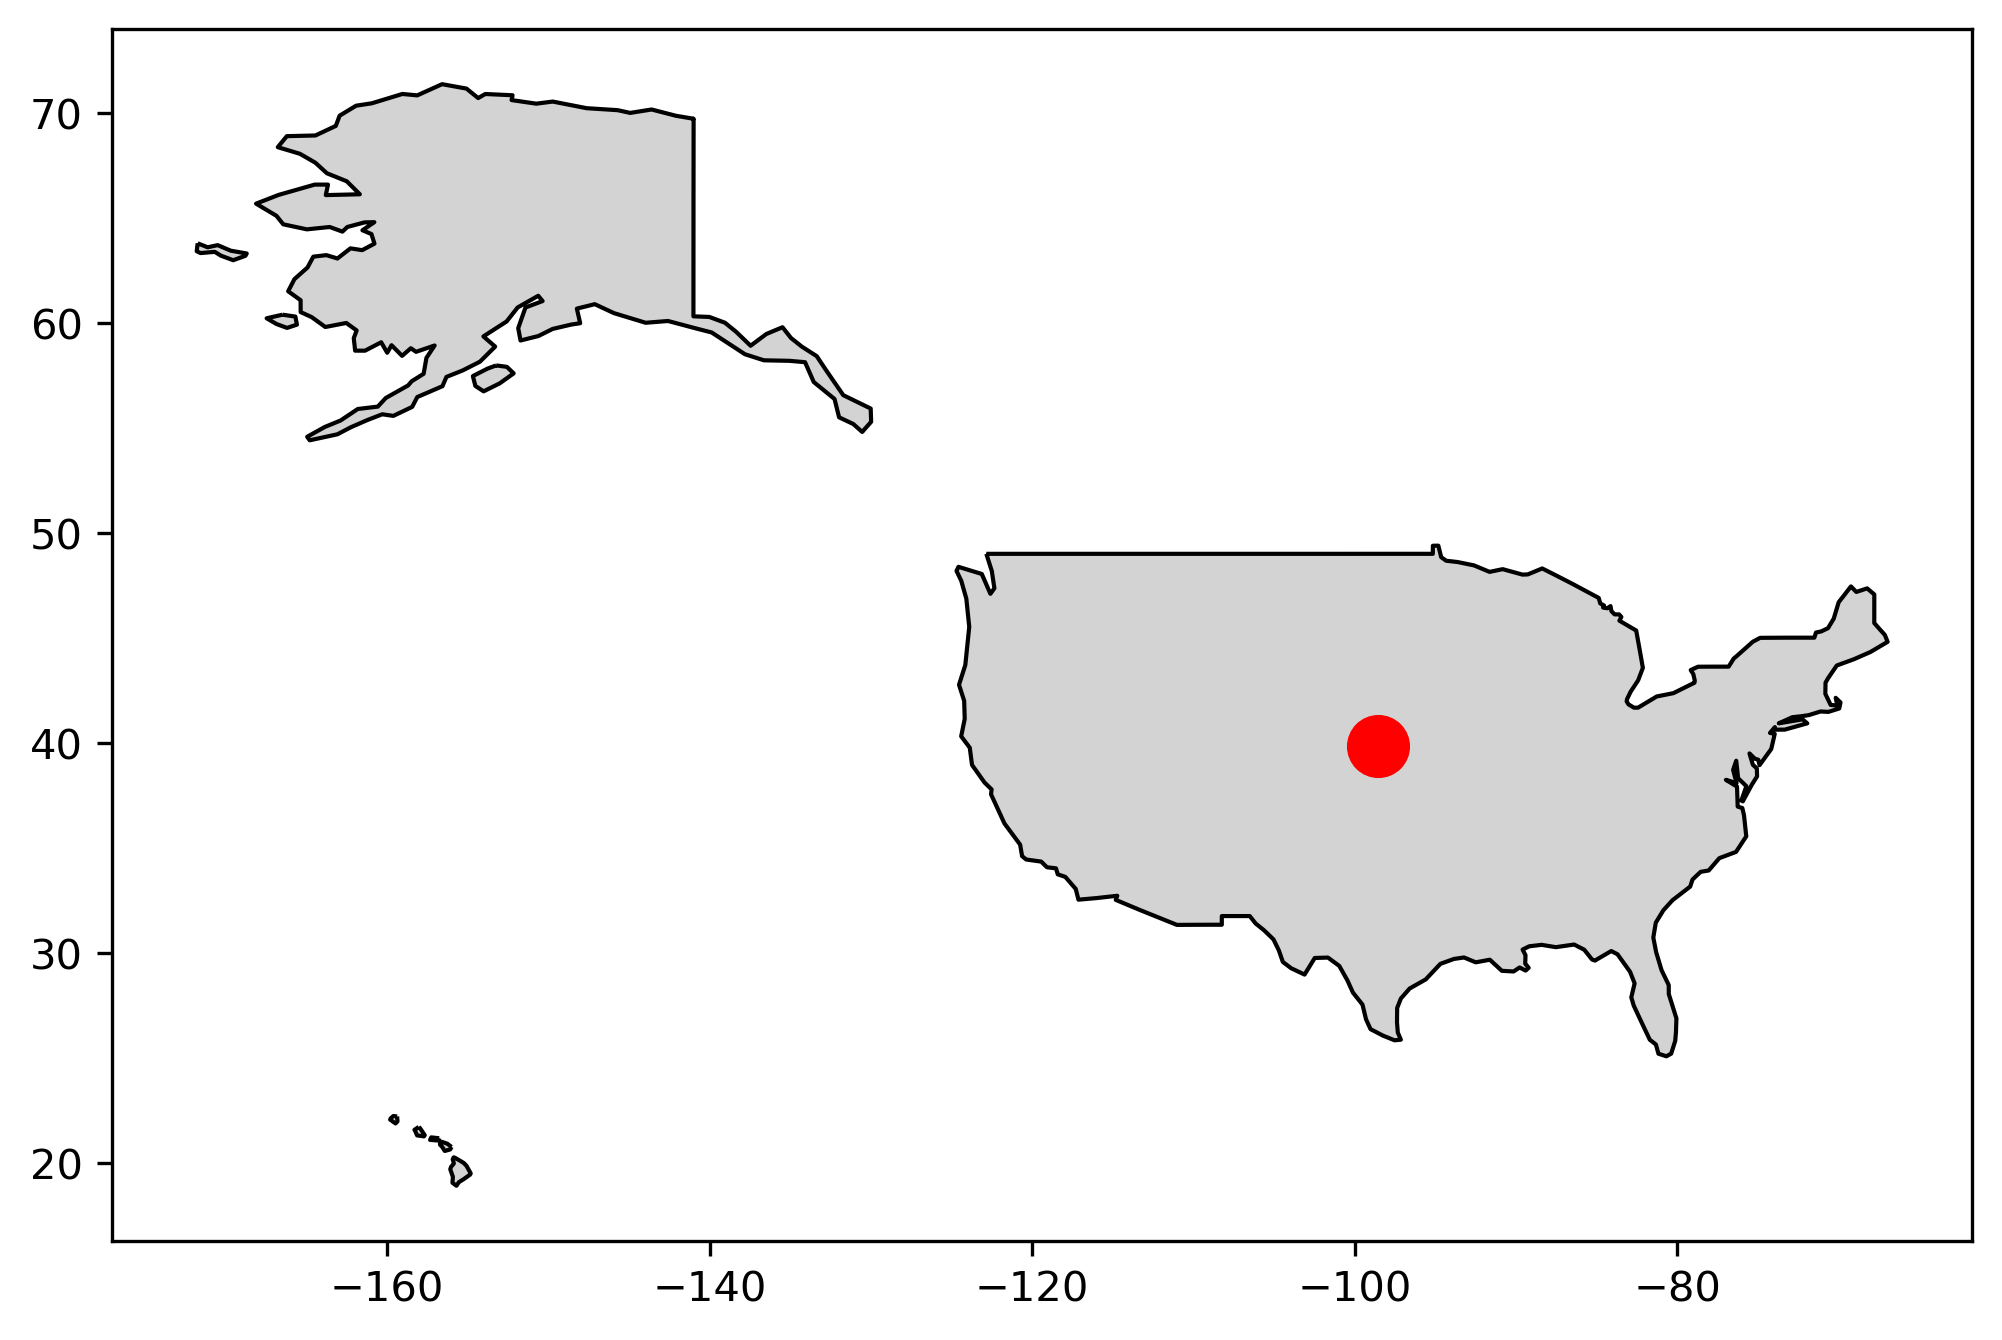

In [107]:
#Make a GeoDataFrame with just a single point at ostensible geographic center of the contiguous US
####39°50′N 98°35
df = pd.DataFrame(
    {'Description': ['Geographic Center'],
     'Latitude': [39 + 50/60],
     'Longitude': [-(98 + 35/60)]})

gdf_center = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")


fig, ax1 = plt.subplots(1,1, figsize=(8, 6), dpi=300)

world.loc[world['iso_a3'] == 'USA'].plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
gdf_center.plot(ax = ax1, markersize = 200, color='red');

In [108]:
#And now plot in N. Am. Albers:
########

In [109]:
usa_map = world.loc[world['iso_a3'] == 'USA']

In [110]:
#Convert to North American Albers:
usa_map = usa_map.to_crs(5070)

#Convert Centroid:
gdf_center = gdf_center.to_crs(5070)

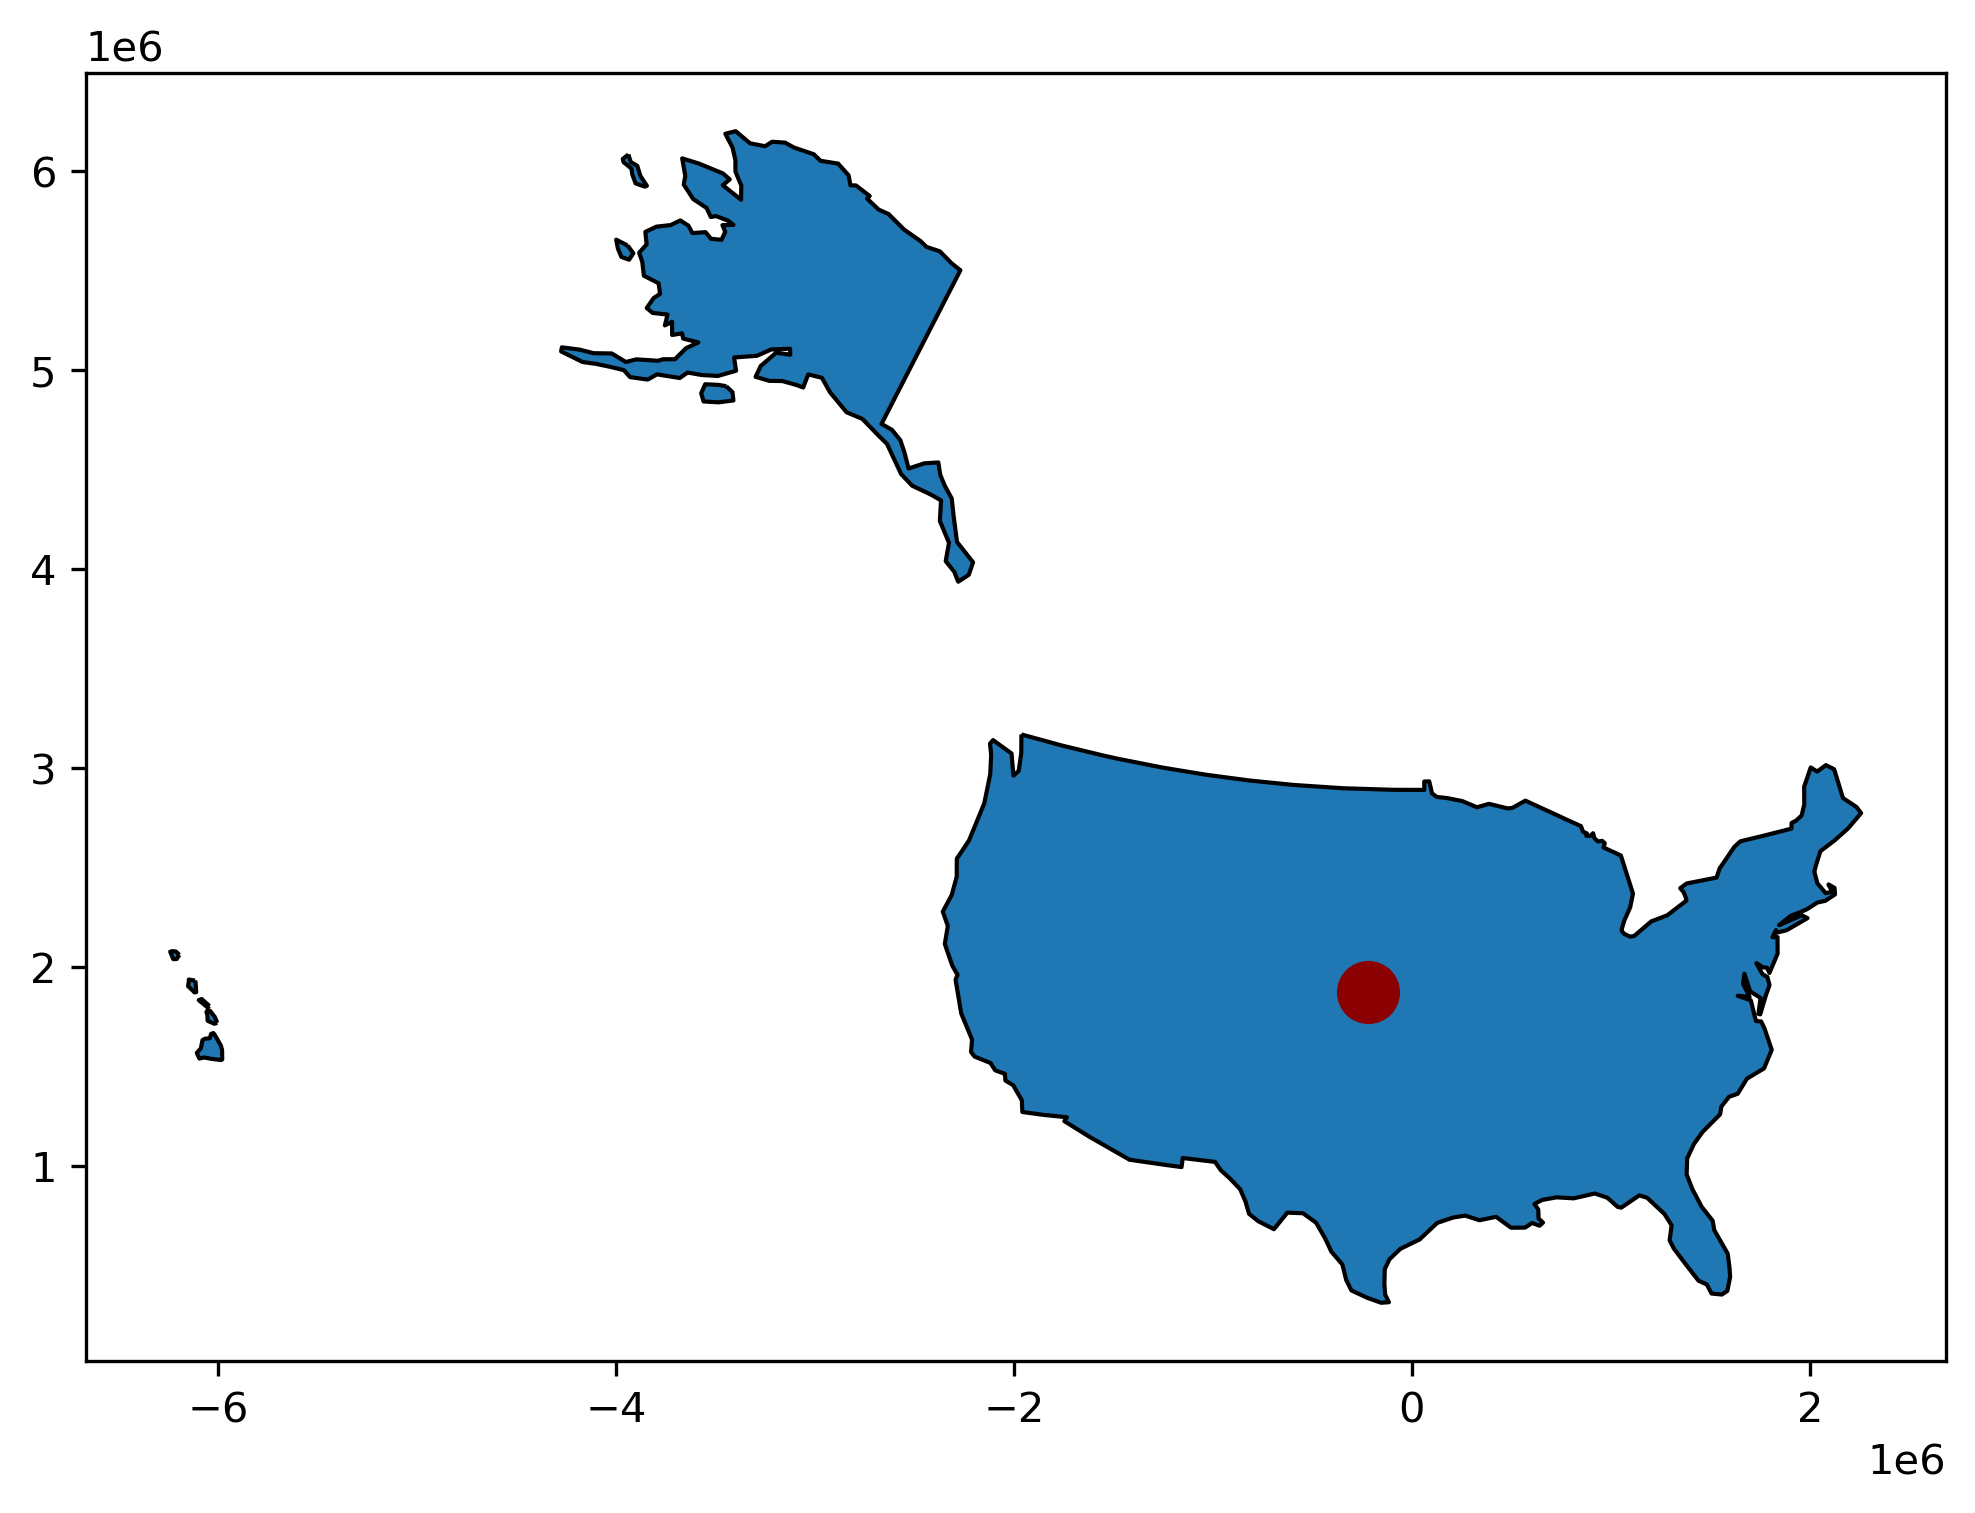

In [111]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 6), dpi=300)

usa_map.plot(ax = ax1, edgecolor='black')
gdf_center.plot(ax = ax1, markersize = 200, color='darkred');

### Make and plot polygon geometries

- Let's do a quick exercise in solar scalability
- Just use some rule of thumb numbers...


In [112]:
###Let's calculate and visualize the land area needed to generate all US electricity from Solar
#############

#Do everything in kWh

#Approx 2021 US electricity: in kWh
US_electricity = 4.116e12

#Solar irradiance, in kWh m^-2 over the year, averaged over US
S = 1800

#Our solar efficiency, and a performance factor
E = .18
PF = .75

#Energy over the year for a single square meter:
E_m2 = S * E * PF

#And now, required square meters:
m2_needed = US_electricity / E_m2

#In square miles:
sqmile_needed = m2_needed * 3.86102e-7
sqmile_needed

6539.900543209877

In [116]:
#Is this a lot?
#Various areas in square miles:
######

Lower48_area = 3.1199e6
US_area = 3.797e6
Maricopa_area = 9223

sqmile_needed / US_area

0.0017223862373478738

<AxesSubplot: >

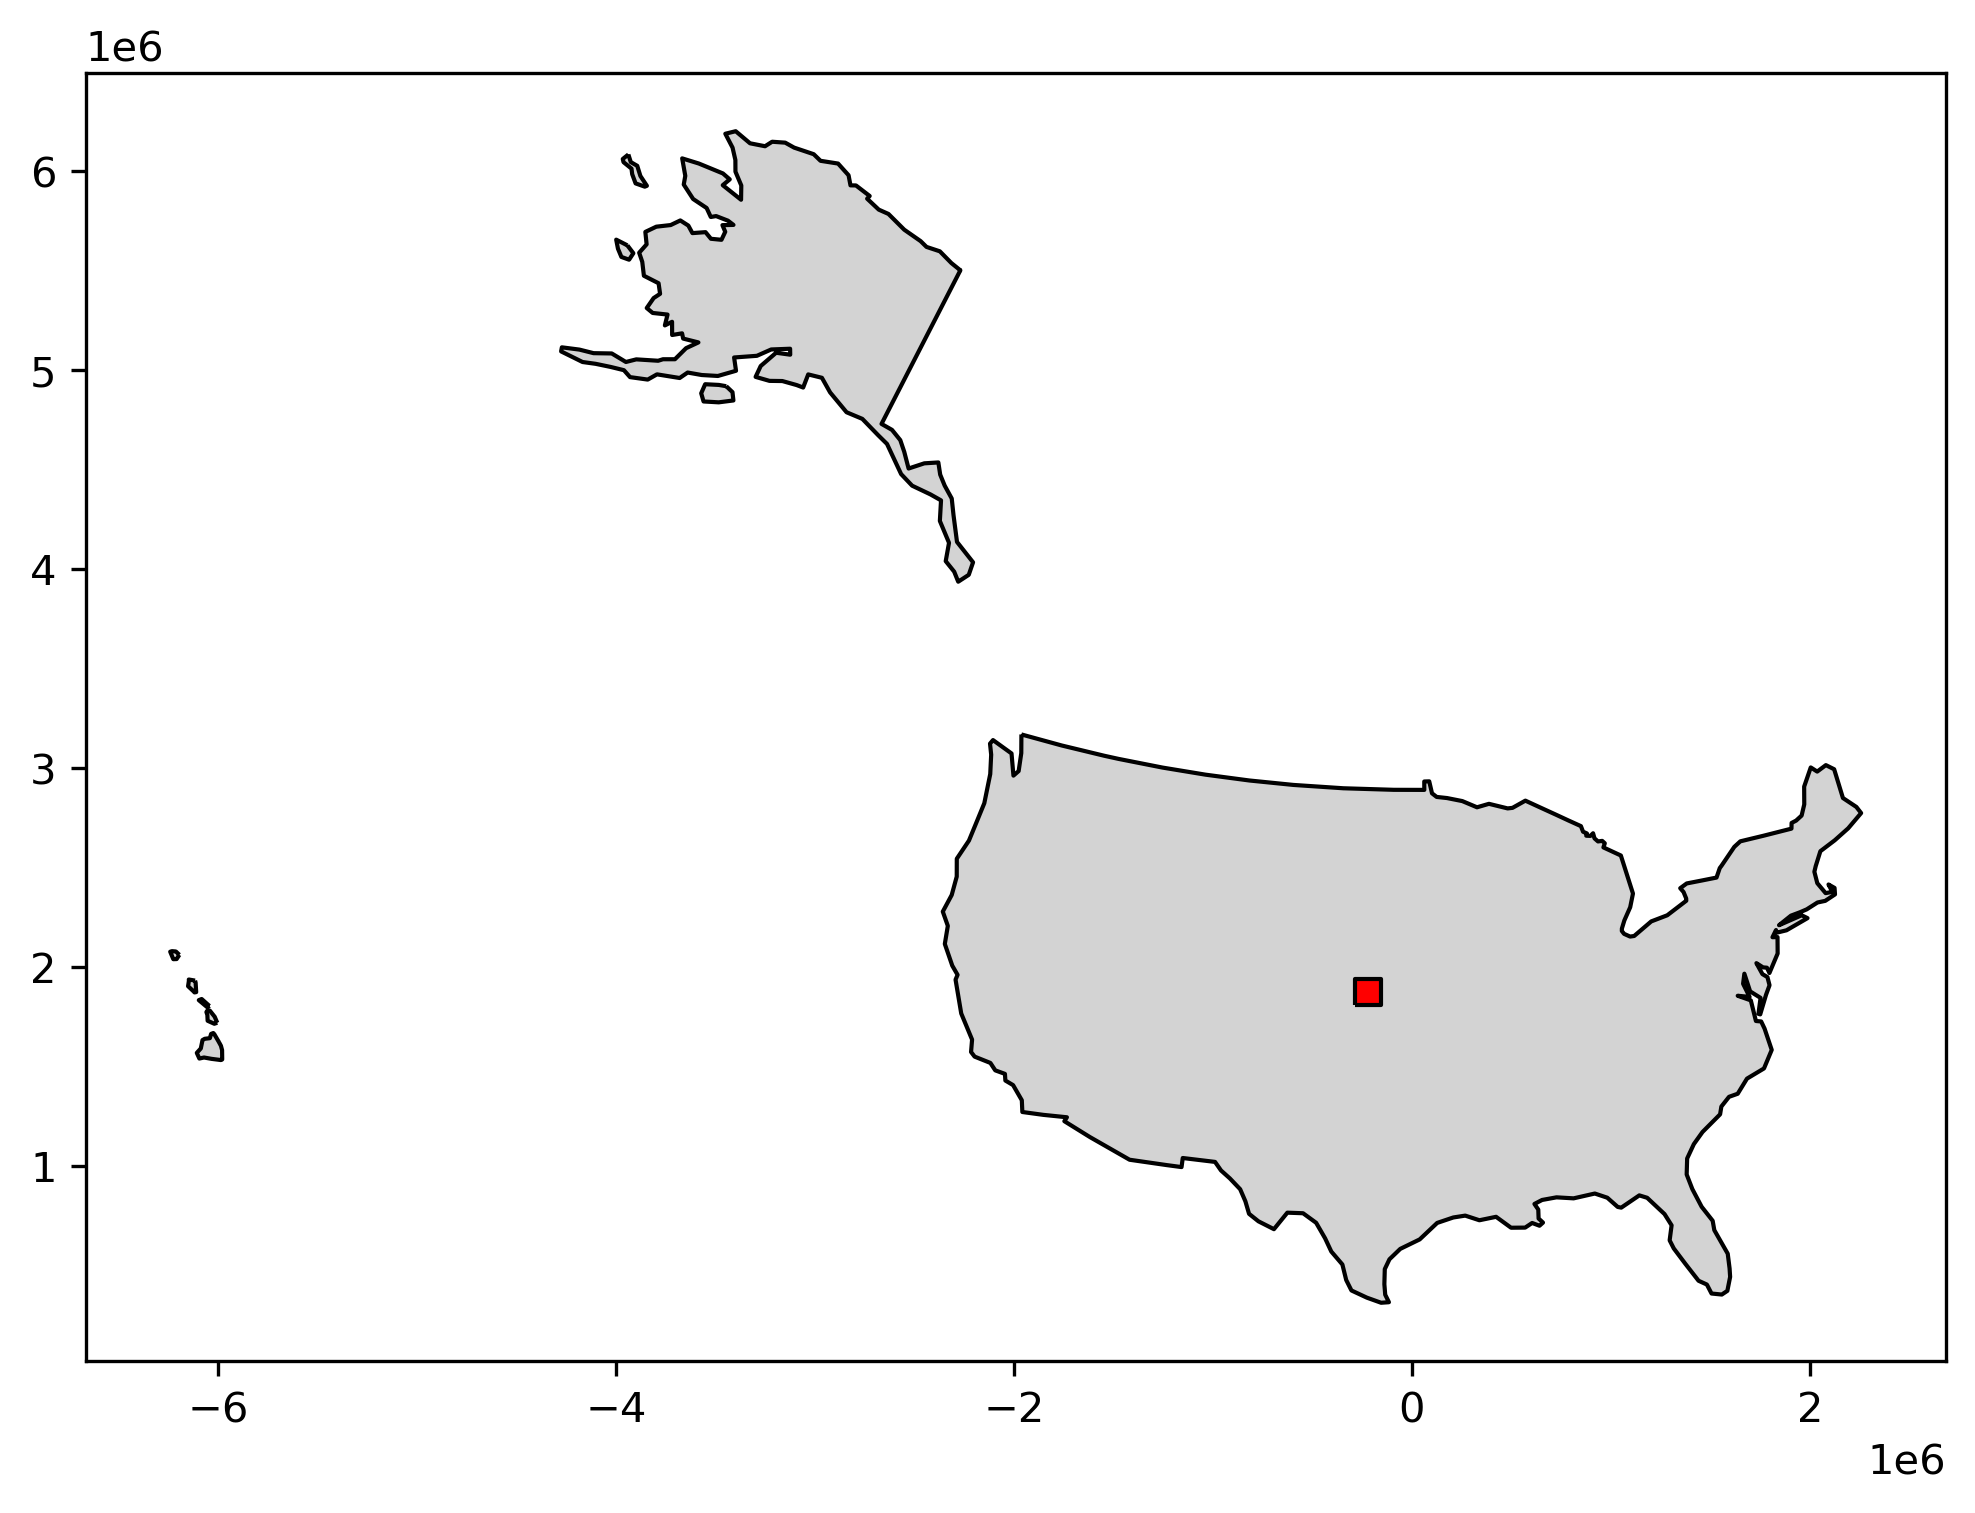

In [118]:
#And let's make a polygon...

#Get a shapely Polygon
from shapely.geometry import Polygon

#Just make a square with the area of m2_needed
val = np.sqrt(m2_needed)


#Use "geographic center" from above for base x/y
x_base = gdf_center.geometry[0].x - val/2
y_base = gdf_center.geometry[0].y - val/2


#And make our polygon:
#####
lon_list = [x_base, x_base+val, x_base+val, x_base]
lat_list = [y_base, y_base, y_base+val, y_base+val]

polygon_geom = Polygon(zip(lon_list, lat_list))


#And put into a GeoDataFrame:
crs = 5070 #Old way: {'init': 'epsg:5070'}
solar_rect = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])


#Plot...
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)
usa_map.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')
solar_rect.plot(ax = ax1, facecolor = 'red', edgecolor='black')

In [119]:
#What does our GeoDataFrame look like?
solar_rect

geometry
0  POLYGON ((-284162.691 1806207.058, -154015.576...

In [121]:
solar_rect.area

0    1.693827e+10
dtype: float64

In [131]:
solar_rect.area

0    1.693827e+10
dtype: float64

In [132]:
#Area for solar as fraction of US area?
###########

#Why values[0]? solar_rect.area is a GeoSeries, as is usa_map.area: Indices may not align!
solar_rect.area.values[0] / usa_map.area.values[0]

0.0017810230604964358

In [133]:
#Get the areas of the polygons that make up the multipolygon?
##########

polys = usa_map.geometry.explode()

polys

C:\Users\steff\AppData\Local\Temp\ipykernel_30592\1520426156.py:4: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  polys = usa_map.geometry.explode()


4  0    POLYGON ((-1962161.370 3167162.825, -1759244.7...
   1    POLYGON ((-5994579.739 1621439.289, -5984478.4...
   2    POLYGON ((-6002902.016 1718460.300, -6017763.5...
   3    POLYGON ((-6042036.927 1802608.920, -6051657.0...
   4    POLYGON ((-6114401.729 1930232.663, -6111577.2...
   5    POLYGON ((-6193278.678 2059630.455, -6207172.8...
   6    POLYGON ((-3942083.583 5624680.128, -3912081.0...
   7    POLYGON ((-3445165.527 4916819.652, -3413967.0...
   8    POLYGON ((-2268903.691 5499339.016, -2268904.2...
   9    POLYGON ((-3937165.872 6081290.121, -3924949.6...
Name: geometry, dtype: geometry

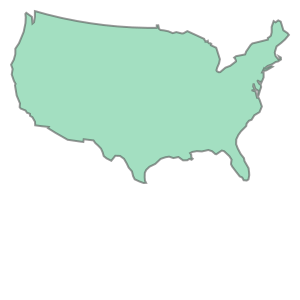

In [134]:
#The first is CONUS:
polys.iloc[0]

In [135]:
#Note, if you want the coords:
list(polys.iloc[0].exterior.coords)

[(-1962161.3702512002, 3167162.8253698274),
 (-1759244.7090589108, 3111553.2812018204),
 (-1545449.6330413173, 3059930.61815036),
 (-1474314.709586353, 3044312.18363005),
 (-1252770.483023552, 3000572.8999905614),
 (-1037133.5987980213, 2965028.692290655),
 (-816816.1897191196, 2935763.8813647977),
 (-595559.4239206862, 2913440.4502210645),
 (-344366.35286531027, 2896648.6669438877),
 (-91028.37163248812, 2888887.159950868),
 (62301.831000003694, 2888497.2179712243),
 (62147.38396207218, 2930667.6015315508),
 (87068.35232383838, 2931459.6548542823),
 (101006.71912840151, 2871364.440293248),
 (124418.75843760684, 2853125.822644014),
 (176573.7886802904, 2847470.3865310536),
 (253257.45300077528, 2832260.9967512945),
 (327245.01461478753, 2801104.8235037685),
 (387207.16933892755, 2818455.9851389676),
 (481130.7062799805, 2795471.349114236),
 (505602.3432948148, 2798248.833605114),
 (570219.6059053084, 2834425.8915207386),
 (643838.0438532329, 2800561.163444683),
 (721422.9436960664, 276

In [136]:
#And area as fraction of CONUS area:
###########

solar_rect.area.values[0] / polys.iloc[0].area

0.002121437106277736

In [137]:
type(polys.iloc[0])

shapely.geometry.polygon.Polygon

<AxesSubplot: >

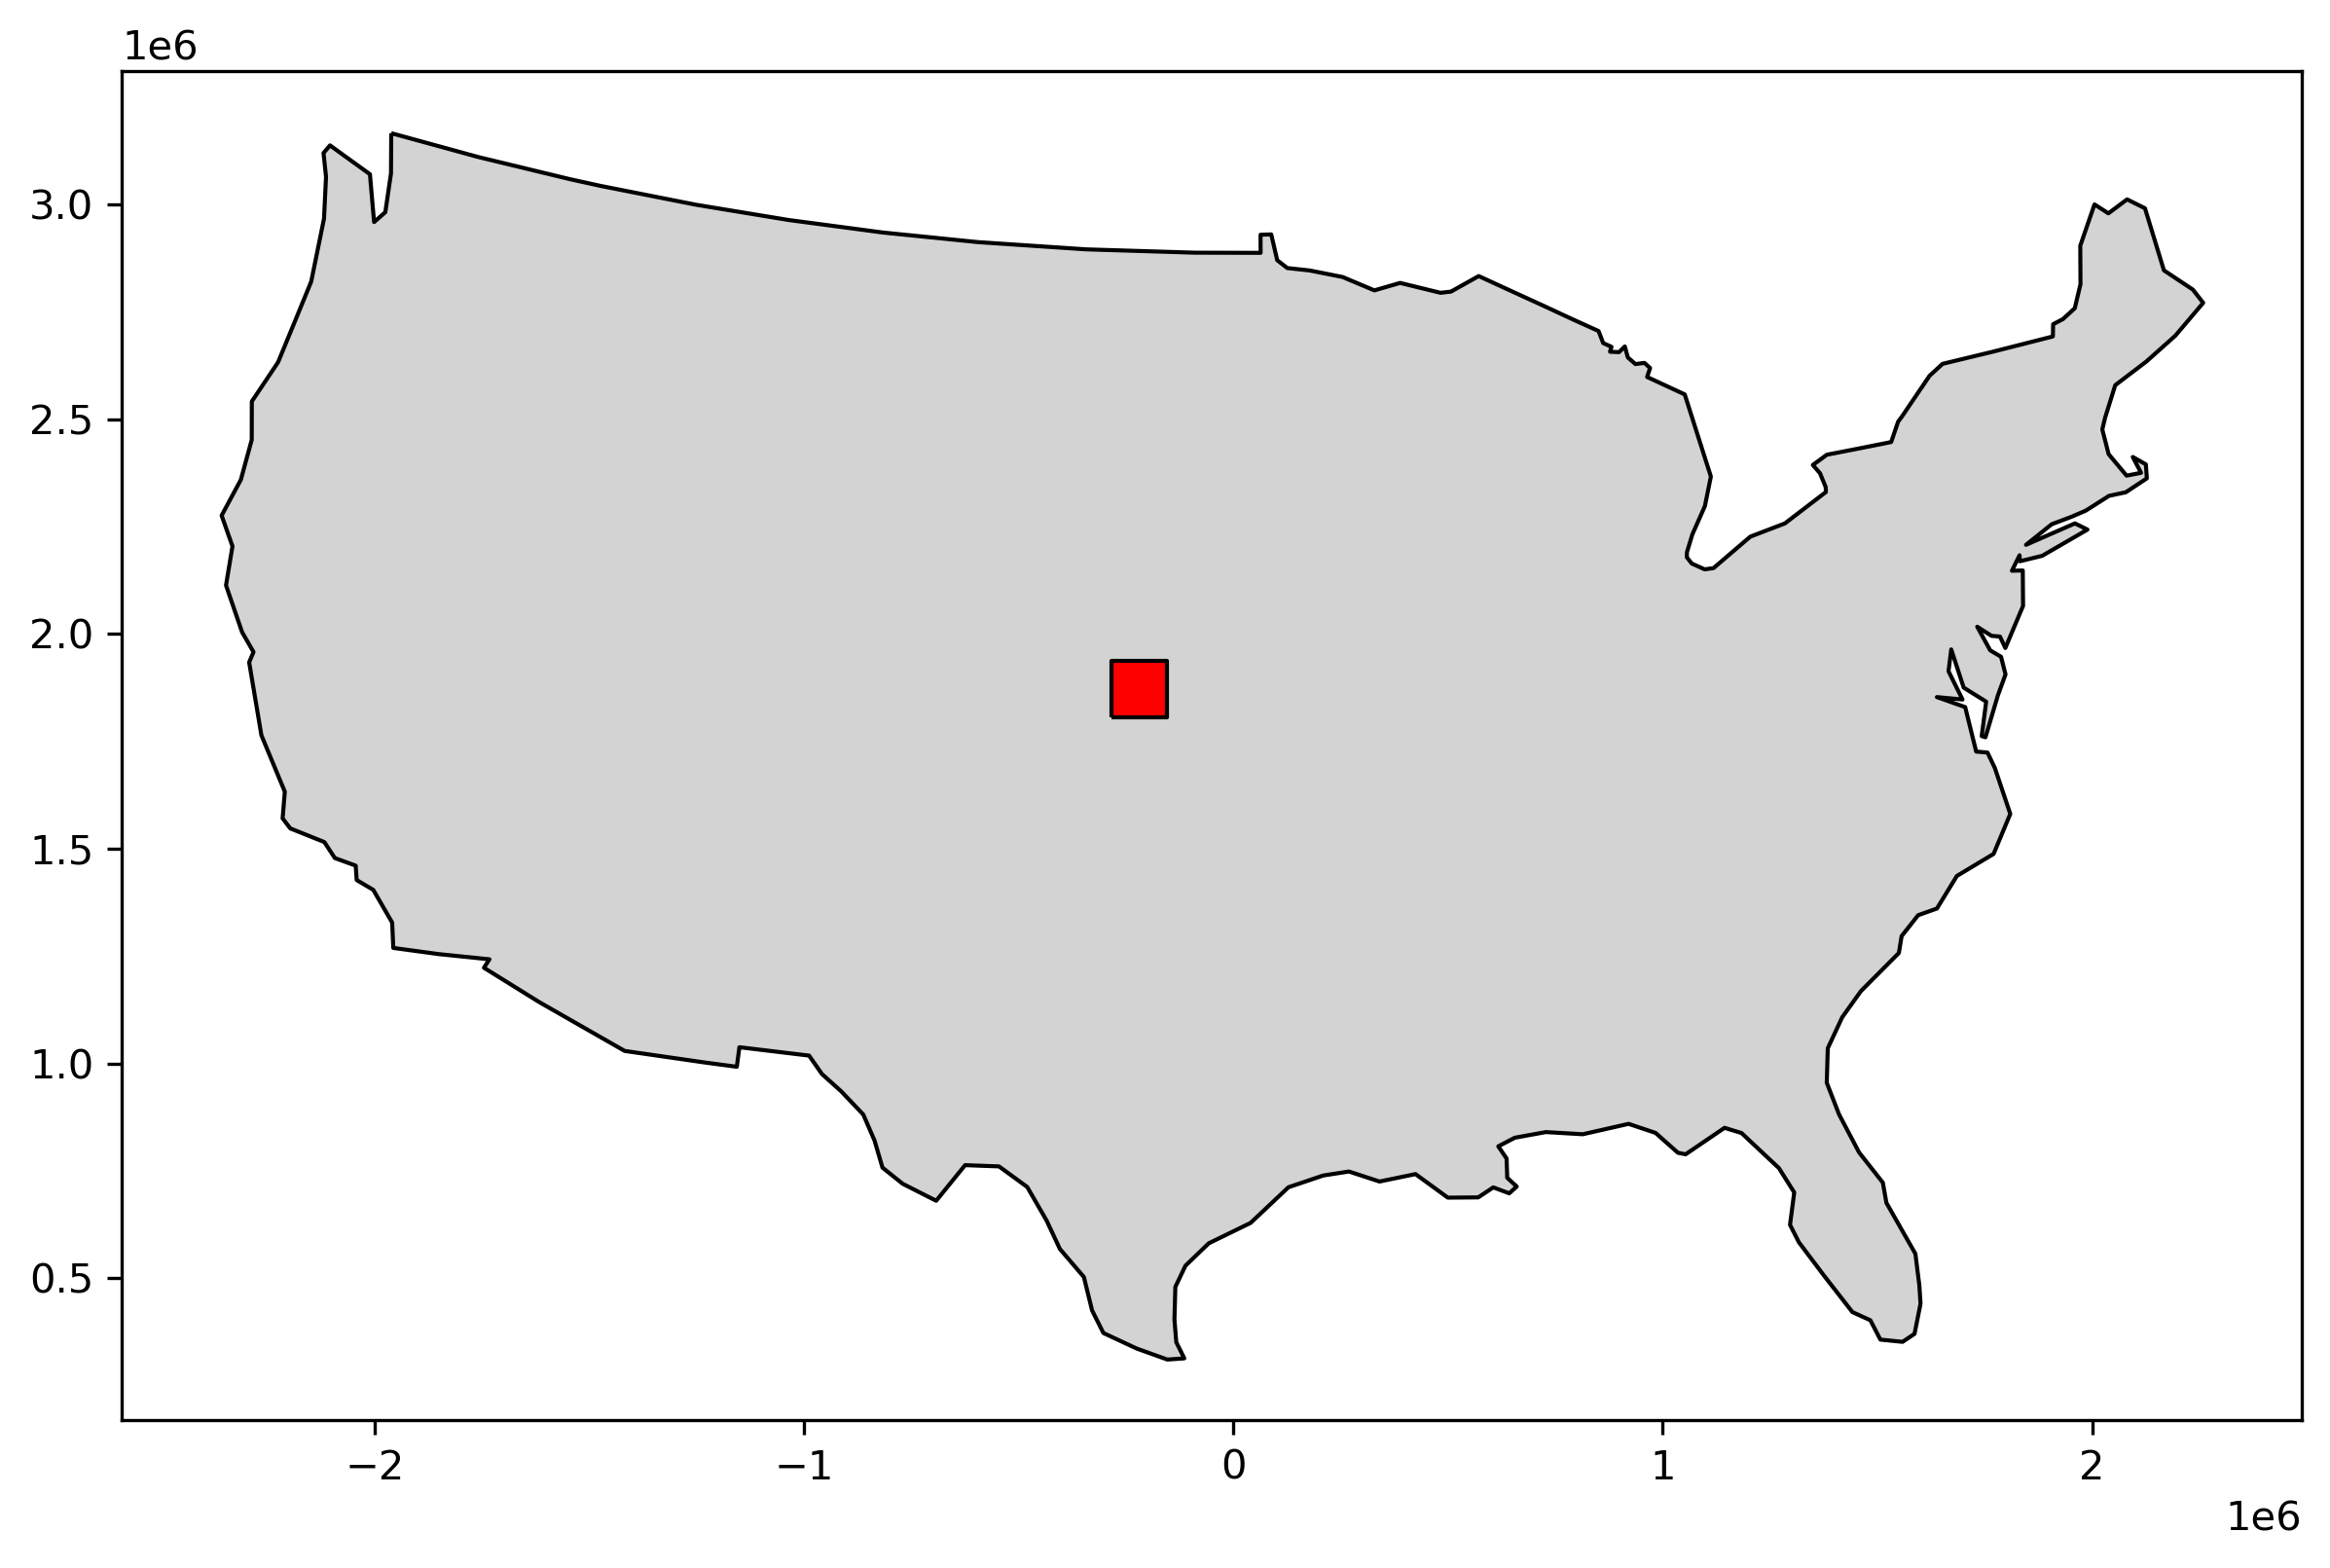

In [139]:
#Note, we can also make a GeoDataFrame of CONUS:
#######

gdf_CONUS = gpd.GeoDataFrame(index=[0], geometry = [polys.iloc[0]], crs = "EPSG:5070")


fig, ax1 = plt.subplots(1,1, figsize=(12, 6), dpi=300)

#Plot CONUS
gdf_CONUS.plot(ax = ax1, facecolor = 'lightgrey', edgecolor='black')

#Plot our solar rectangle
solar_rect.plot(ax = ax1, facecolor = 'red', edgecolor='black')
